#**ANÁLISIS DE LA PANDEMIA COVID-19**

Sin duda alguna la andemia del Covid 19 ha representado el reto más grande de la humanidad de los últimos años. A la fecha de realización de esta notebook se han reportado más de 6 millones de muertes con mas de 530 millones casos reportados a nivel mundial. El entendimiento de como esto se propaga es fundamental para preparnos como sociedad para enfreantar retos similares por venir; y es allí donde éstas herramientas de análisis y predicción cobran valor. Pronosticar los comportamientos de las curvas de contagio y la eficiencia de distintas medidas podrían resultar el salvar muchas vidas.\

El presente proyecto de Ciencia de Datos evaluará características de la pandemia, fundamentalmente enfocado en los siguientes puntos:
\
    **-Análisis Explorartorio de la Data\
    -Entender como inicia una curva\
    -Evaluar estrategias usadas en distintos países\
    -Elaborar modelos predictorios en base a las estrategias adoptadas\
    -Evaluar los modelos realizados en otros países de forma de comprobar su eficiencia**
    

Funciones a utilizar:

# Exploratory Data Analysis

## Librerias

In [1]:
#Librerías Standard:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

#Liberias Estadísticas:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from scipy.optimize import curve_fit
from scipy.stats import norm

#Settings:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#Estilo de colores para todos los gráficos
plt.style.use('Solarize_Light2')
#Para volver a default utilizar lo siguiente:
# plt.rcdefaults()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Datasets

En esta notebook se trabajará con dos datos:\
    -**owid-covid-data.csv** (https://github.com/owid/covid-19-data/tree/master/public/data)
    \
    -**stay-at-home-covid.csv** (https://ourworldindata.org/grapher/stay-at-home-covid)
    \
    \
    Exploremos un poco ambos datasets...

### Principal

In [3]:
owid_covid_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprint Project 4/owid-covid-data.csv')
owid_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192296,ZWE,Africa,Zimbabwe,2022-06-03,253236.0,185.0,182.429,5509.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192297,ZWE,Africa,Zimbabwe,2022-06-04,253236.0,0.0,182.429,5509.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192298,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192299,ZWE,Africa,Zimbabwe,2022-06-06,253508.0,170.0,202.286,5513.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


La data cuenta con 190.184 filas y 67 columnas.

**Revisando dataset**

In [4]:
owid_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192301 non-null  object 
 1   continent                                   181123 non-null  object 
 2   location                                    192301 non-null  object 
 3   date                                        192301 non-null  object 
 4   total_cases                                 184750 non-null  float64
 5   new_cases                                   184508 non-null  float64
 6   new_cases_smoothed                          183334 non-null  float64
 7   total_deaths                                166260 non-null  float64
 8   new_deaths                                  166240 non-null  float64
 9   new_deaths_smoothed                         165077 non-null  float64
 

Se pueden ver muchas columnas no completan las celdas totales por lo que presentan nulos.\
Seleccionemos algunas columnas de interés y cambiemos el formato de la fecha.\
Las columnas seleccionadas son:\
\
-**date**: fecha.\
-**location**: país.\
-**continent**: continente.\
-**total_cases**: casos totales acumulados para el día.\
-**new_cases_smoothed_per_million**: nuevos casos reportados por cada millón de habitantes. Permite complementar la información data por total_cases.\
-**reproduction_rate**:(R) parámetro quizas más importante y mediático de una pandemia. Es la estimación de la velocidad de contagiosidad, que diferencia que tan agresiva es una enfermedad para el contagio.\
-**stringency_index**: indicador asociado al nivel de severidad en la aplicación de políticas. Está compuesto por 9 indicadores de respuestas que incluyen cierres de escuelas, cierre de espacios de trabajo, prohibiciones de vaje, entre otros. Va de 0 a 100, siendo 100 la respuesta más estricta aplicada.


In [5]:
#Corregimos la hora
data_original = owid_covid_data[['date', 'location', 'continent', 'total_cases', 'new_cases_smoothed_per_million', 'reproduction_rate','stringency_index']]
data_original["date"]=pd.to_datetime(data_original["date"])
# data_original.dropna(inplace=True)
data_original.reset_index(inplace=True,drop=True)
data_original

,date,location,continent,total_cases,new_cases_smoothed_per_million,reproduction_rate,stringency_index
0,2020-02-24,Afghanistan,Asia,5.0,NaN,NaN,8.33
1,2020-02-25,Afghanistan,Asia,5.0,NaN,NaN,8.33
2,2020-02-26,Afghanistan,Asia,5.0,NaN,NaN,8.33
3,2020-02-27,Afghanistan,Asia,5.0,NaN,NaN,8.33
4,2020-02-28,Afghanistan,Asia,5.0,NaN,NaN,8.33
...,...,...,...,...,...,...,...
192296,2022-06-03,Zimbabwe,Africa,253236.0,12.088,NaN,NaN
192297,2022-06-04,Zimbabwe,Africa,253236.0,12.088,NaN,NaN
192298,2022-06-05,Zimbabwe,Africa,253338.0,11.794,NaN,NaN
192299,2022-06-06,Zimbabwe,Africa,253508.0,13.403,NaN,NaN


In [6]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            192301 non-null  datetime64[ns]
 1   location                        192301 non-null  object        
 2   continent                       181123 non-null  object        
 3   total_cases                     184750 non-null  float64       
 4   new_cases_smoothed_per_million  182487 non-null  float64       
 5   reproduction_rate               143384 non-null  float64       
 6   stringency_index                149975 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 10.3+ MB


Se observan algunos valores nulos en las columnas elegidas

In [7]:
data_original.isna

<bound method DataFrame.isna of              date     location continent  total_cases  \
0      2020-02-24  Afghanistan      Asia          5.0   
1      2020-02-25  Afghanistan      Asia          5.0   
2      2020-02-26  Afghanistan      Asia          5.0   
3      2020-02-27  Afghanistan      Asia          5.0   
4      2020-02-28  Afghanistan      Asia          5.0   
...           ...          ...       ...          ...   
192296 2022-06-03     Zimbabwe    Africa     253236.0   
192297 2022-06-04     Zimbabwe    Africa     253236.0   
192298 2022-06-05     Zimbabwe    Africa     253338.0   
192299 2022-06-06     Zimbabwe    Africa     253508.0   
192300 2022-06-07     Zimbabwe    Africa     253637.0   

        new_cases_smoothed_per_million  reproduction_rate  stringency_index  
0                                  NaN                NaN              8.33  
1                                  NaN                NaN              8.33  
2                                  NaN           

Revisemos los nulos...

In [8]:
#IDENTIFICANDO VALORES FALTANTES:

#Realizamos sumatoria de todas las instancias nulas en cada columna, además se almacenan solo aquellas que tienen nulos, de esto resulta una serie:
data_original_nulos = data_original.isnull().sum().sort_values(ascending =False)[data_original.isnull().sum()>0]
# print(type(ar_properati_nulos)) #codigo de chequeo

#Convertimos la serie en dataframe
data_original_nulos_df = pd.DataFrame({'Nombre_de_columna_con_Nulos':data_original_nulos.index,'Cant_de_Nulos':data_original_nulos.values})

#Almacenamos la cantidad de filas totales del dataframe:
filas = data_original.shape[0]
print("La cantidad de instancias (filas) totales es de %i."%(filas))

# print("Cantidad de nulos por columnas y el porcentaje que re presentan:")
data_original_nulos_df['% de Nulos'] = round(((data_original_nulos_df.Cant_de_Nulos/filas)*100),2)
data_original_nulos_df

La cantidad de instancias (filas) totales es de 192301.


,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos
0,reproduction_rate,48917,25.44
1,stringency_index,42326,22.01
2,continent,11178,5.81
3,new_cases_smoothed_per_million,9814,5.10
4,total_cases,7551,3.93


Vemos que existen numero agrupados por continentes y a nivel mundial, esto habria que tenerlo en cuenta en caso de querer hacer agrupaciones.

In [9]:
unique = data_original.nunique()
unique

date                                 889
location                             244
continent                              6
total_cases                       101341
new_cases_smoothed_per_million     84115
reproduction_rate                    389
stringency_index                     181
dtype: int64

### Cuarentena

In [10]:
data_cuarentena = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprint Project 4/stay-at-home-covid.csv')
data_cuarentena.dropna(inplace=True)
data_cuarentena.reset_index(drop=True)
data_cuarentena.rename(columns={'Entity':'location','Day':'date'}, inplace=True)
data_cuarentena

,location,Code,date,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
162734,Zimbabwe,ZWE,2022-05-20,2
162735,Zimbabwe,ZWE,2022-05-21,2
162736,Zimbabwe,ZWE,2022-05-22,2
162737,Zimbabwe,ZWE,2022-05-23,2


La data de cuarentena tiene 160722 entradas en 4 columnas

**Revisando dataset**

In [11]:
data_cuarentena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162739 entries, 0 to 162738
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   location                162739 non-null  object
 1   Code                    162739 non-null  object
 2   date                    162739 non-null  object
 3   stay_home_requirements  162739 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ MB


Se puede ver que no hay valores nulos, en todas las columnas hay 160722 entradas no nulas.

In [12]:
#Corregimos la hora
data_cuarentena["date"]=pd.to_datetime(data_cuarentena["date"])
data_cuarentena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162739 entries, 0 to 162738
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   location                162739 non-null  object        
 1   Code                    162739 non-null  object        
 2   date                    162739 non-null  datetime64[ns]
 3   stay_home_requirements  162739 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
unique = data_cuarentena.nunique()
unique

location                  186
Code                      186
date                      889
stay_home_requirements      4
dtype: int64

Eliminemos la columna **code** por considerarla innecesaria...

In [14]:
data_cuarentena = data_cuarentena.drop(columns=['Code'])
data_cuarentena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162739 entries, 0 to 162738
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   location                162739 non-null  object        
 1   date                    162739 non-null  datetime64[ns]
 2   stay_home_requirements  162739 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.0+ MB


En la columna **stay_home_requirements** aparecen 4 valores unicos, cuando deberían ser solo 2 (1 ó 0), por lo que hagamos una corección... 

In [15]:
data_cuarentena.stay_home_requirements.replace([3,2],1, inplace=True)
unique = data_cuarentena.nunique()
unique

location                  186
date                      889
stay_home_requirements      2
dtype: int64

In [16]:
data_cuarentena['stay_home_requirements'].unique()

array([0, 1])

De esta forma tenemos solo dos opciones para requerimiento de cuarentena, estuvo o no e cuarentena ese día.

## Data por paises agrupados

Generemos una grafica de todos los paises para comprararle con otra fuente y ver si la data es lógica...

In [17]:
data_original_world = data_original[data_original['location']=='World'].reset_index(drop=True)
# data_original_world

todos_los_paises = data_original_world.resample('D', on = 'date').sum()
print(todos_los_paises.shape)
todos_los_paises

(868, 4)


,total_cases,new_cases_smoothed_per_million,reproduction_rate,stringency_index
date,,,,
2020-01-22,557.0,0.000,0.00,0.0
2020-01-23,657.0,0.000,3.09,0.0
2020-01-24,944.0,0.000,3.27,0.0
2020-01-25,1437.0,0.000,3.44,0.0
2020-01-26,2120.0,0.000,3.51,0.0
...,...,...,...,...
2022-06-03,531372172.0,60.317,0.00,0.0
2022-06-04,531621190.0,59.654,0.00,0.0
2022-06-05,531876475.0,59.316,0.00,0.0


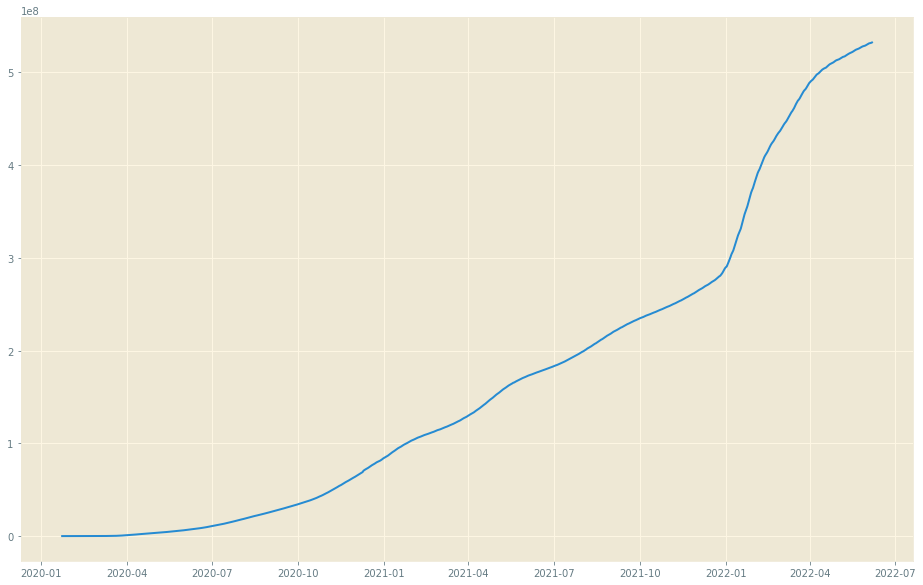

In [18]:
plt.figure(figsize=(16,10))
plt.plot(todos_los_paises['total_cases'])
plt.show()

Se observan casi 600 millones de casos, notándose el aumento por nuevas olas en Enero de este año, lo cual se compara muy bien con data de otra fuente, tal como:\
https://www.worldometers.info/coronavirus/worldwide-graphs/

## Selección de Paises

Para la selección de los paises se usó como criterio piases del hemisferio norte, donde comenzó la pandemia. Además, como material de apoyo según un estudio de 182 países acerca de data confiable de covid, se eligió de la zona de paises mós confiables siguiendo este articulo.\
(https://www.mdpi.com/2673-8112/1/1/13/htm)



Eligiendo:\
    -United Kingdom\
    -Spain\
    -Slovenia\
    -Israel\
    -Portugal\
    -Lithuania\
    -Albania\
    -Germany\
    -Norway\
    -Georgia

Revisemos que se encuentren en la data:

In [19]:
countries = ["United Kingdom",'Spain','Slovenia','Israel','Portugal','Lithuania','Albania','Germany','Norway','Georgia']
for country in countries:
    if country in data_original['location'].values:
        print(country, ' is in dataset')
    else:
        print(country, ' is NOT in dataset')

United Kingdom  is in dataset
Spain  is in dataset
Slovenia  is in dataset
Israel  is in dataset
Portugal  is in dataset
Lithuania  is in dataset
Albania  is in dataset
Germany  is in dataset
Norway  is in dataset
Georgia  is in dataset


Definamos arreglos a utilizar...

In [20]:
countries_data = data_original['location']
cases_data = data_original['total_cases']

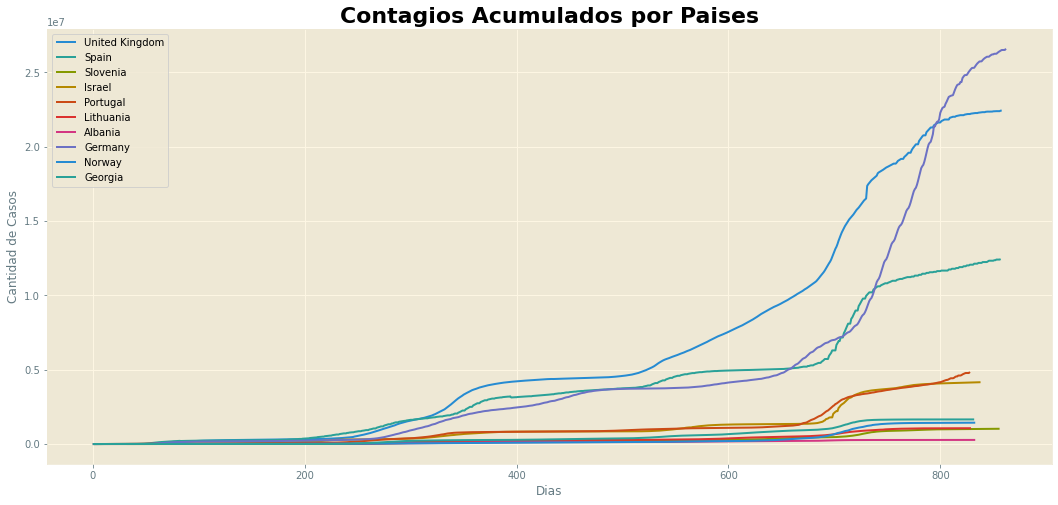

In [21]:
plt.figure(figsize=(18,8))
countries = ["United Kingdom",'Spain','Slovenia','Israel','Portugal','Lithuania','Albania','Germany','Norway','Georgia']

for country in countries:

    lista = []
    ind = np.where(countries_data==country)
    ind = ind[0]
    cases = cases_data[ind]
    days = np.arange(0,len(cases))
    plt.title("Contagios Acumulados por Paises", fontsize=22, fontweight ="bold")
    plt.plot(days,cases, label=country)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de Casos')
    plt.legend(loc=0)

Utilizemos la siguiente función para revisar los casos totales en todo el tiempo y además que nos permita ir cambiar inicio y fin para buscar mejor tendencia de inicio de cada pais seleccionado...

In [22]:
def plot_country_to_study(country,t0,tt):

    plt.figure(figsize=(15,7))

    plt.subplot(2,2,1)
    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    days=np.arange(0,len(cases))
    plt.plot(days,cases)
    plt.title('Casos ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de Casos')

    plt.subplot(2,2,3)
    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    dias=np.arange(0,len(cases))
    plt.plot(days,np.log(cases))
    plt.title('Log Casos ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Log Cantidad de Casos')

    #**************************************************

    cases_start=cases[t0:tt]
    days_start=days[t0:tt]

    plt.subplot(2,2,2)
    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    dias=np.arange(0,len(cases))
    plt.plot(days_start,cases_start)
    plt.title('Inicio Casos ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de Casos')

    plt.subplot(2,2,4)
    ind=np.where(countries_data==country)
    ind=ind[0]
    plt.plot(days_start,np.log(cases_start))
    plt.title('Log Inicio Casos ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Log Cantidad de Casos')

    plt.tight_layout()
    plt.show()

**Reino Unido**

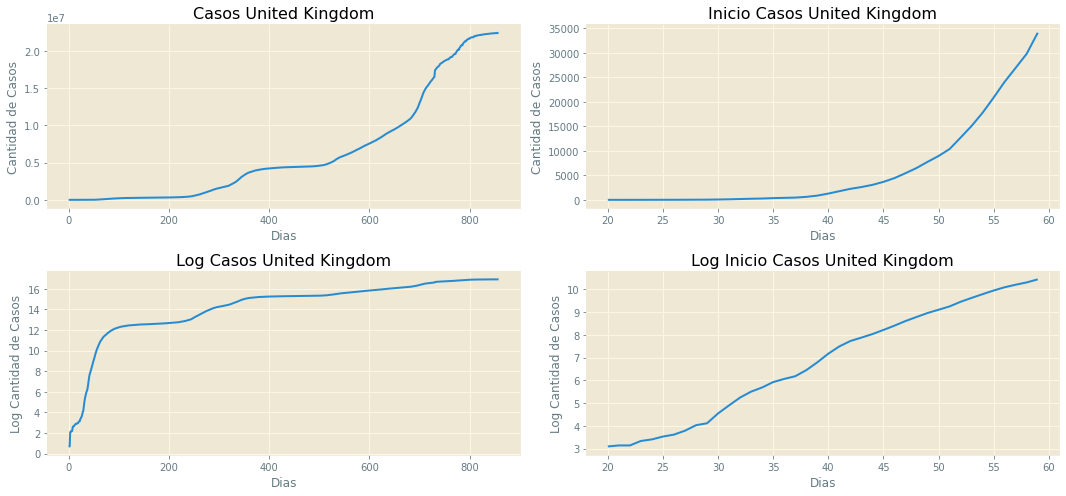

In [23]:
t0_uk = 20
tt_uk = 60
plot_country_to_study('United Kingdom',t0_uk,tt_uk)

**España**

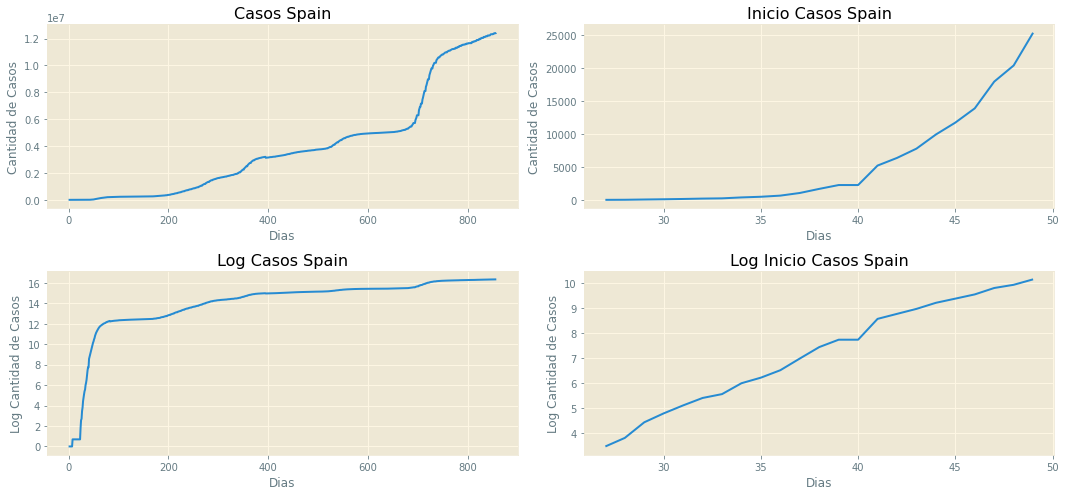

In [24]:
t0_sp = 27
tt_sp = 50
plot_country_to_study('Spain',t0_sp,tt_sp)

**Eslovenia**

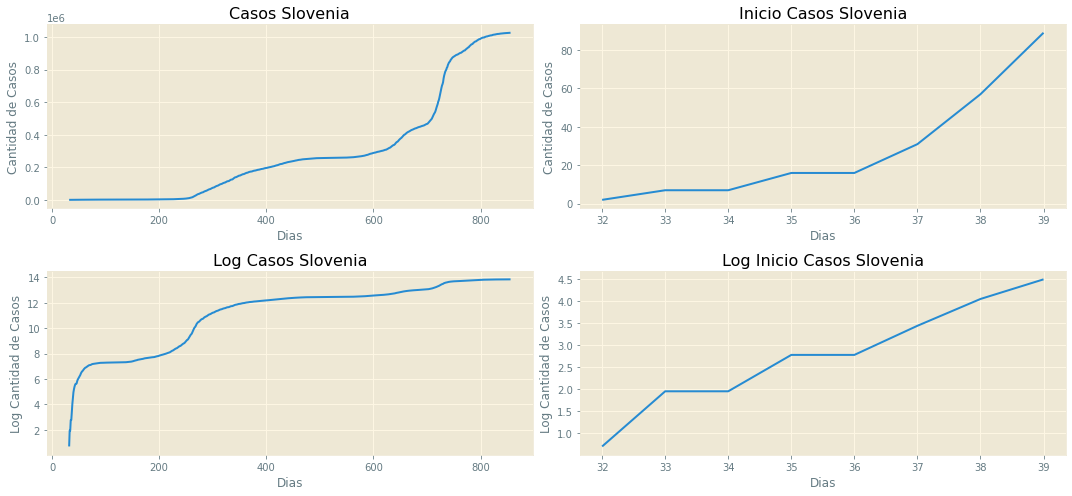

In [25]:
t0_sl = 32
tt_sl = 40
plot_country_to_study('Slovenia',t0_sl,tt_sl)

**Isrrael**

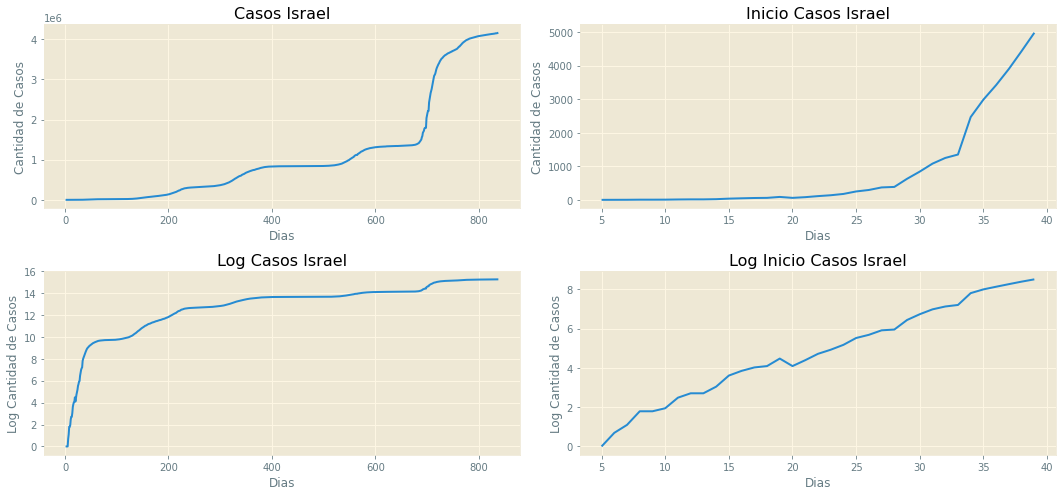

In [26]:
t0_is = 5
tt_is = 40
plot_country_to_study('Israel',t0_is,tt_is)

**Portugal**

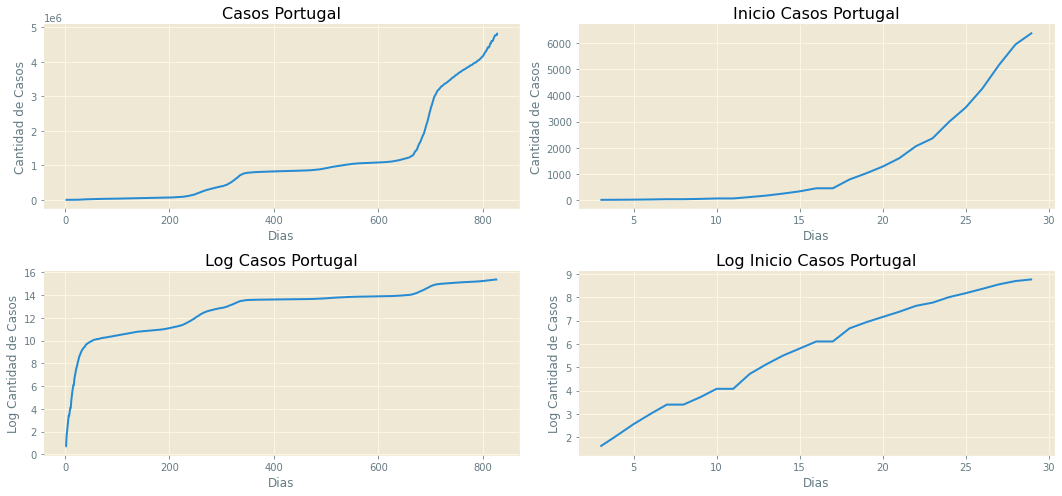

In [27]:
t0_po = 3
tt_po = 30
plot_country_to_study('Portugal',t0_po,tt_po)

**Lituania**

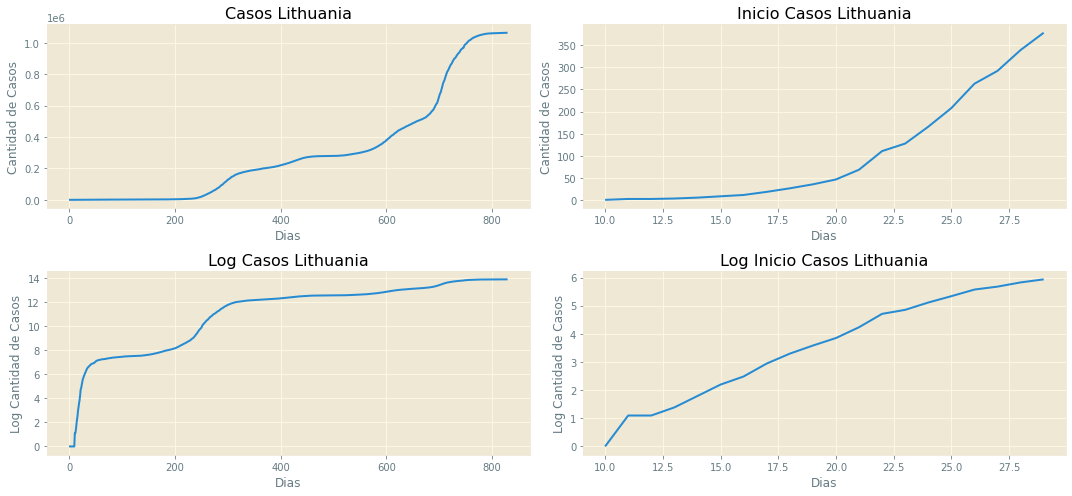

In [28]:
t0_li = 10
tt_li = 30
plot_country_to_study('Lithuania',t0_li,tt_li)

**Albania**

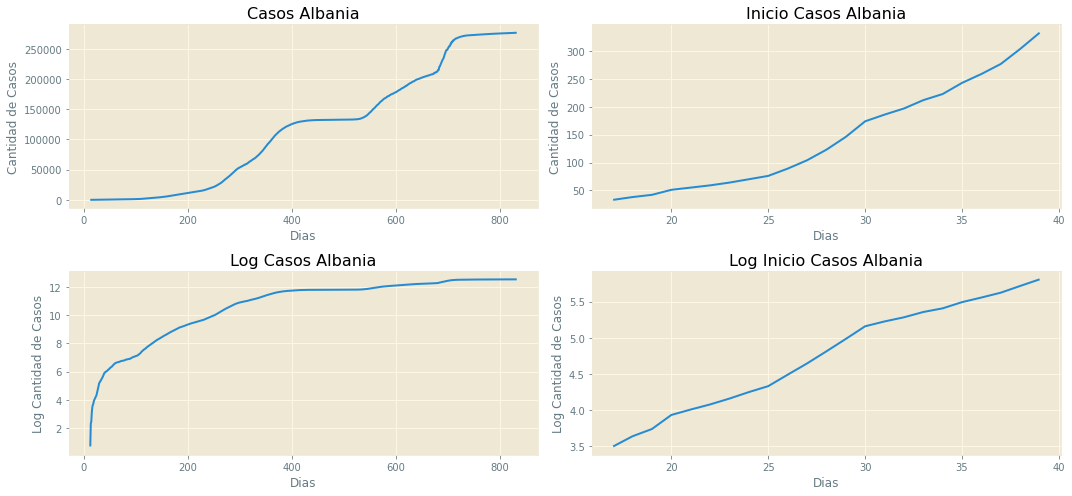

In [29]:
t0_al = 17
tt_al = 40
plot_country_to_study('Albania',t0_al,tt_al)

**Alemania**

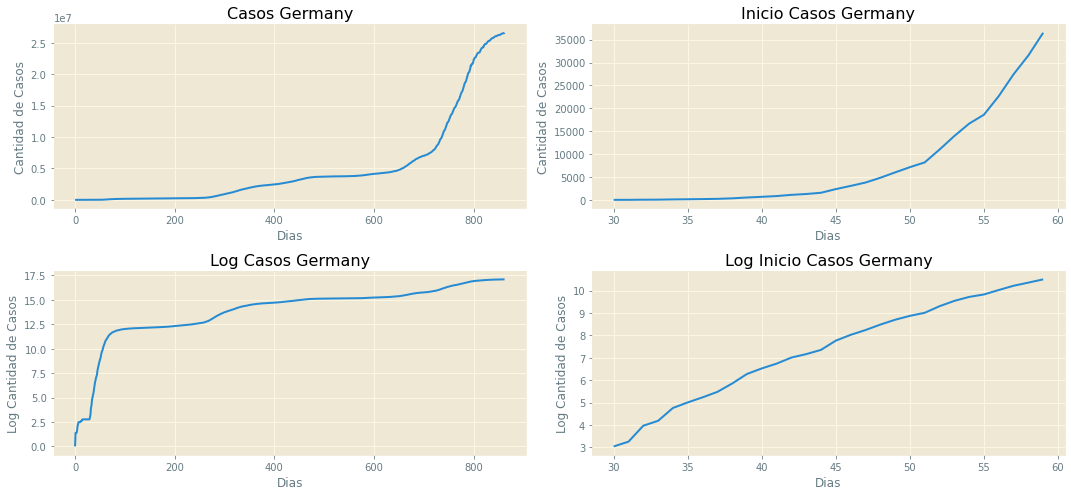

In [30]:
t0_ge = 30
tt_ge = 60
plot_country_to_study('Germany',t0_ge,tt_ge)

**Noruega**

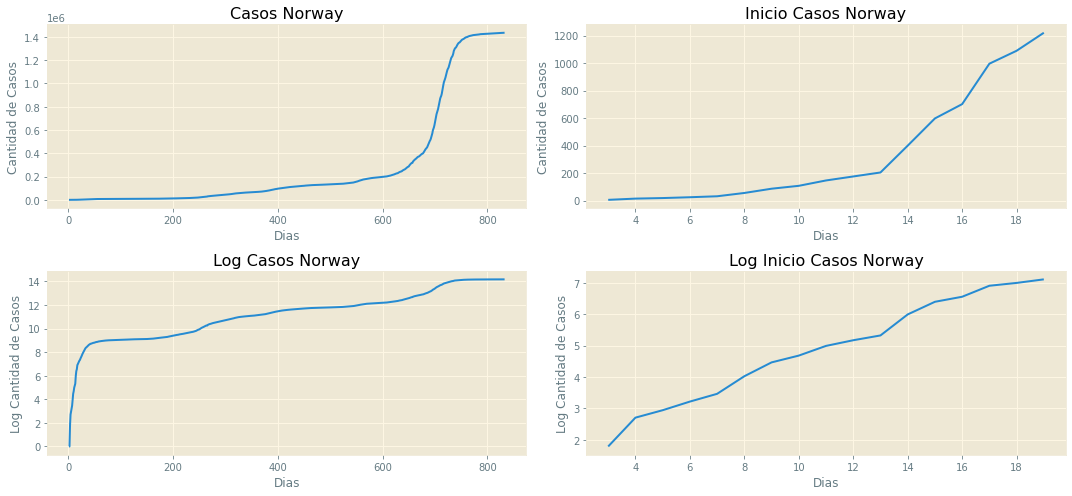

In [31]:
t0_no = 3
tt_no = 20
plot_country_to_study('Norway',t0_no,tt_no)

**Georgia**

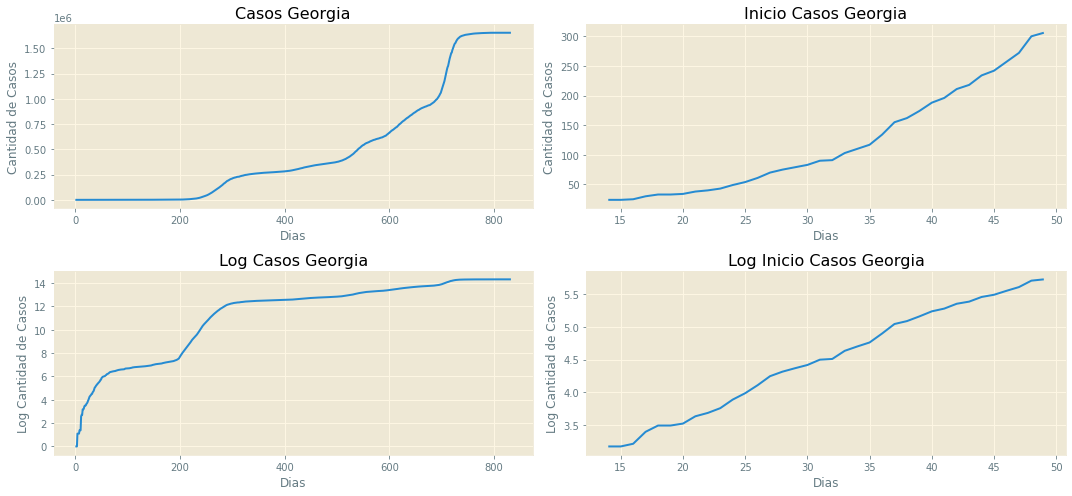

In [32]:
t0_geo = 14
tt_geo = 50
plot_country_to_study('Georgia',t0_geo,tt_geo)

Después del análisis anterior tenemos los siguientes valores:

In [33]:
#Paises seleccionados:
countries = ["United Kingdom",'Spain','Slovenia','Israel','Portugal','Lithuania','Albania','Germany','Norway','Georgia']

#Inicio y Fin de la curva
T_inicial = [t0_uk,           t0_sp,  t0_sl,      t0_is,    t0_po,    t0_li,      t0_al,   t0_ge,     t0_no,    t0_geo]
T_final =   [tt_uk,           tt_sp,  tt_sl,      tt_is,    tt_po,    tt_li,      tt_al,   tt_ge,     tt_no,    tt_geo]
rango = pd.DataFrame({"Country":countries, "t0":T_inicial,"tf":T_final})
rango

,Country,t0,tf
0,United Kingdom,20,60
1,Spain,27,50
2,Slovenia,32,40
3,Israel,5,40
4,Portugal,3,30
5,Lithuania,10,30
6,Albania,17,40
7,Germany,30,60
8,Norway,3,20
9,Georgia,14,50


In [34]:
rango.describe()

,t0,tf
count,10.000000,10.000000
mean,16.100000,42.000000
std,10.999495,13.165612
min,3.000000,20.000000
25%,6.250000,32.500000
50%,15.500000,40.000000
75%,25.250000,50.000000
max,32.000000,60.000000


# Indice de Contagio: K

Definamos una función que nos ayudará con el cálculo de K...

In [35]:
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

# def casos_nuevos(casos):
#   nuevos=np.zeros(len(casos))
#   i=0
#   while i<len(nuevos)-1:
#     nuevos[i]=casos[i+1]-casos[i]
#     i=i+1

#   return nuevos

## Tramo por país

Definamos una función que permita estimar el valor K del pais seleccionado...

In [36]:
def info_country(pais, t0, tf):

    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    days=np.arange(0,len(cases))

    cases_start=cases[t0:tf]
    days_start=days[t0:tf]

    #ajustamos ---- scipy.optimize.curve_fit(f, xdata, ydata)
    popt, pcov = curve_fit(exponencial, days_start, cases_start)

    k=popt[0]
    t0_=popt[1]
    cases_simu=exponencial(days_start,k,t0_)

    dic = {"Pais": country , "t0":[t0], "t":[tf], "k": [k]}
    country_info = pd.DataFrame(data=dic)
    return country_info

In [37]:
def plot_country(country, t0, tf):

    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    days=np.arange(0,len(cases))

    cases_start=cases[t0:tf]
    days_start=days[t0:tf]

    #ajustamos ---- scipy.optimize.curve_fit(f, xdata, ydata)
    popt, pcov = curve_fit(exponencial, days_start, cases_start)

    k=popt[0]
    t0_=popt[1]
    cases_simu=exponencial(days_start,k,t0_)

    dic = {"Pais": country , "t0":[t0], "t":[tf], "k": [k]}
    country_info = pd.DataFrame(data=dic)

    plt.figure(figsize=(20,5))
    plt.suptitle(country, fontsize=22, fontweight="bold", y=1.05)
        

    plt.subplot(1,3,1)
    plt.plot(days_start,cases_start)
    plt.title("Curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(1,3,2)
    plt.plot(days_start,np.log(cases_start))
    plt.title("Logaritmo de la curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(1,3,3)
    plt.title("Prediccion del modelo")
    plt.plot(days_start,cases_start,'.')
    plt.plot(days_start,cases_simu)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')
    
    plt.tight_layout(h_pad=1, rect=(0,0,0,0))

In [38]:
def plot_country2(df,country, t0, tf):
    
    countries_data = df['location']
    cases_data = df['total_cases']

    ind=np.where(countries_data==country)
    ind=ind[0]
    cases=cases_data[ind]
    days=np.arange(0,len(cases))

    cases_start=cases[t0:tf]
    days_start=days[t0:tf]

    #ajustamos ---- scipy.optimize.curve_fit(f, xdata, ydata)
    popt, pcov = curve_fit(exponencial, days_start, cases_start)

    k=popt[0]
    t0_=popt[1]
    cases_simu=exponencial(days_start,k,t0_)

    dic = {"Pais": country , "t0":[t0], "t":[tf], "k": [k]}
    country_info = pd.DataFrame(data=dic)

    plt.figure(figsize=(20,5))
    plt.suptitle(country, fontsize=22, fontweight="bold", y=1)
    

    plt.subplot(1,3,1)
    plt.plot(days_start,cases_start)
    plt.title("Curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(1,3,2)
    plt.plot(days_start,np.log(cases_start))
    plt.title("Logaritmo de la curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(1,3,3)
    plt.title("Prediccion del modelo")
    plt.plot(days_start,cases_start,'.')
    plt.plot(days_start,cases_simu)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')
    
    plt.tight_layout()

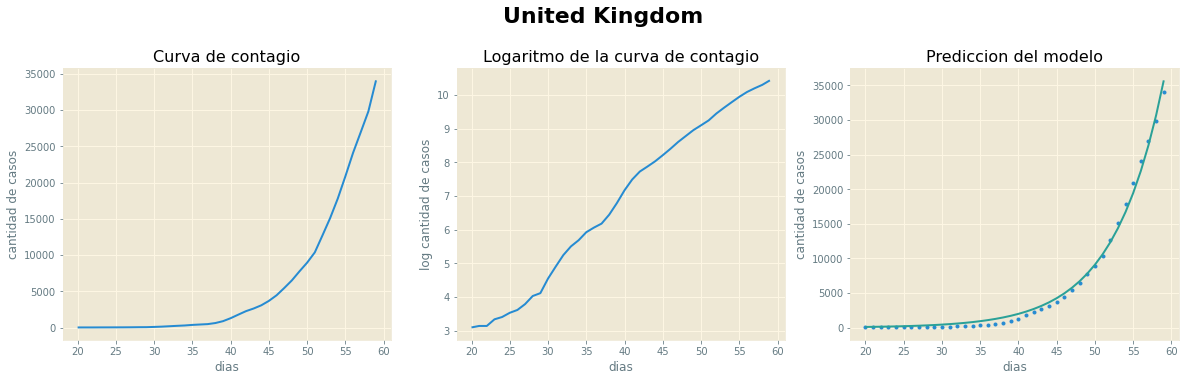

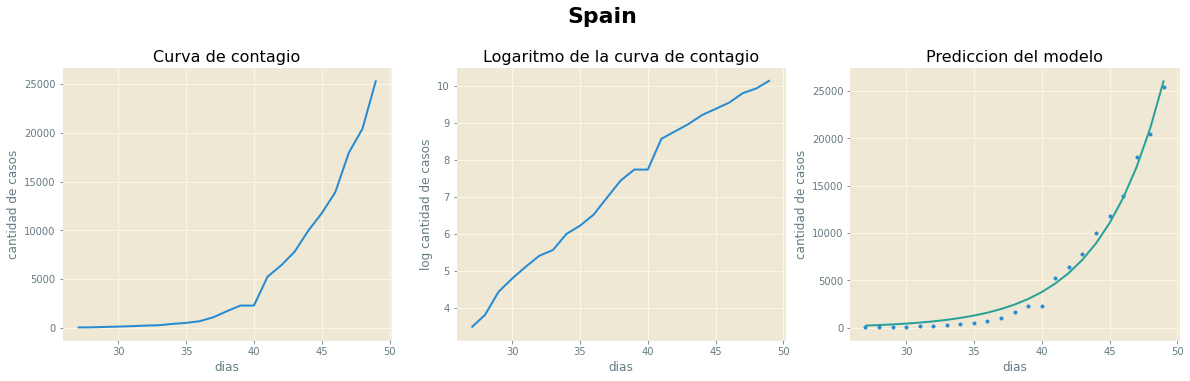

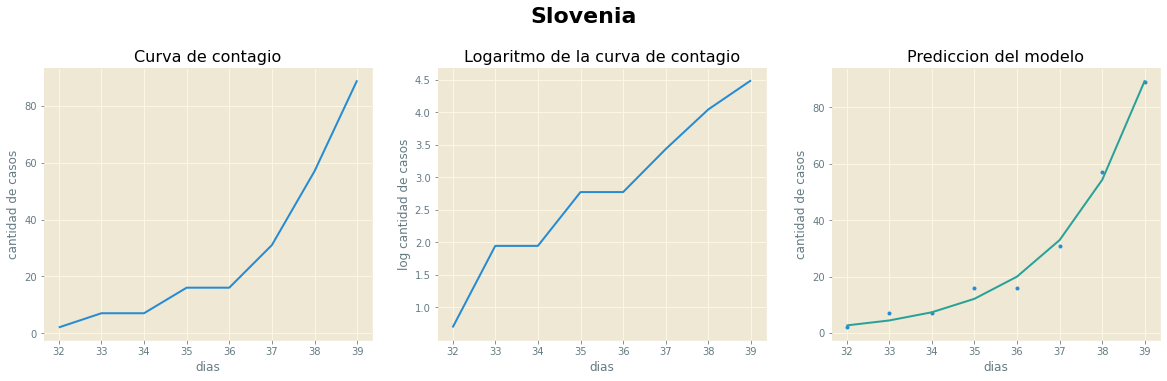

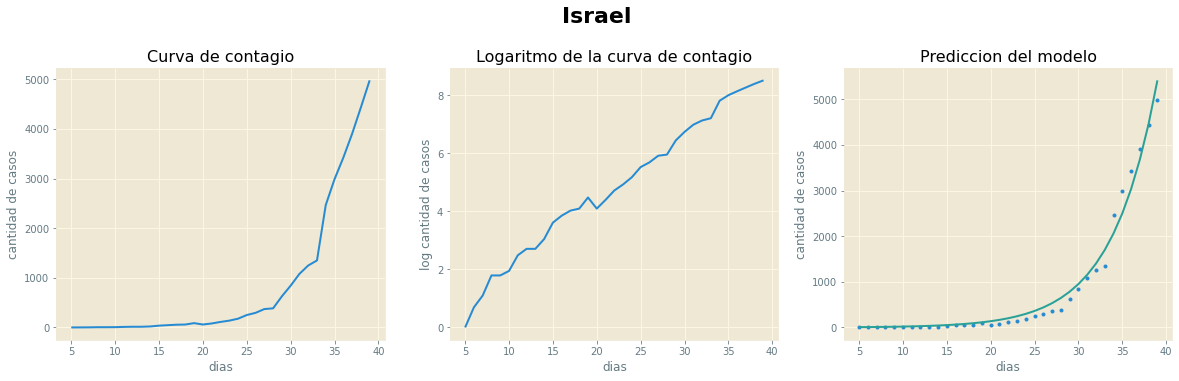

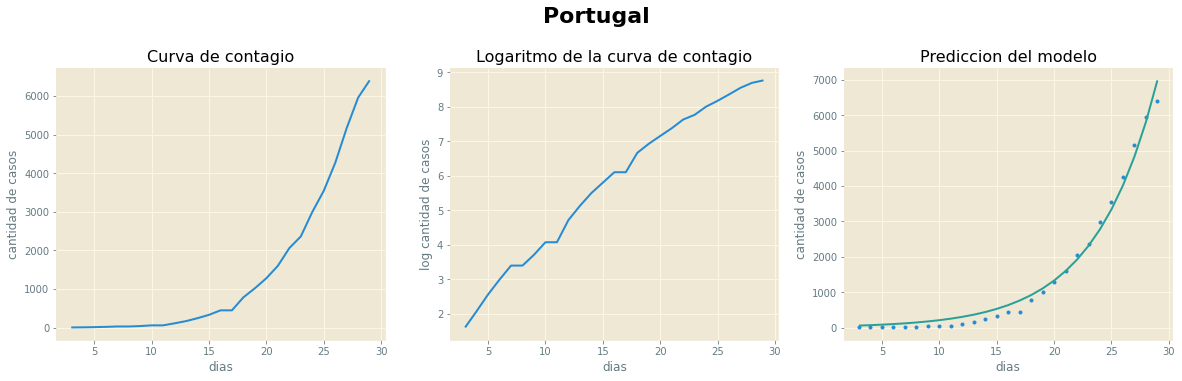

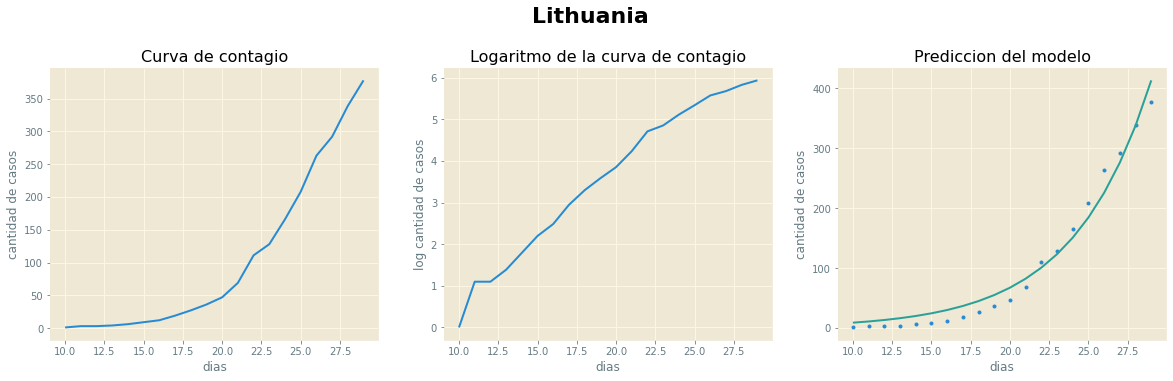

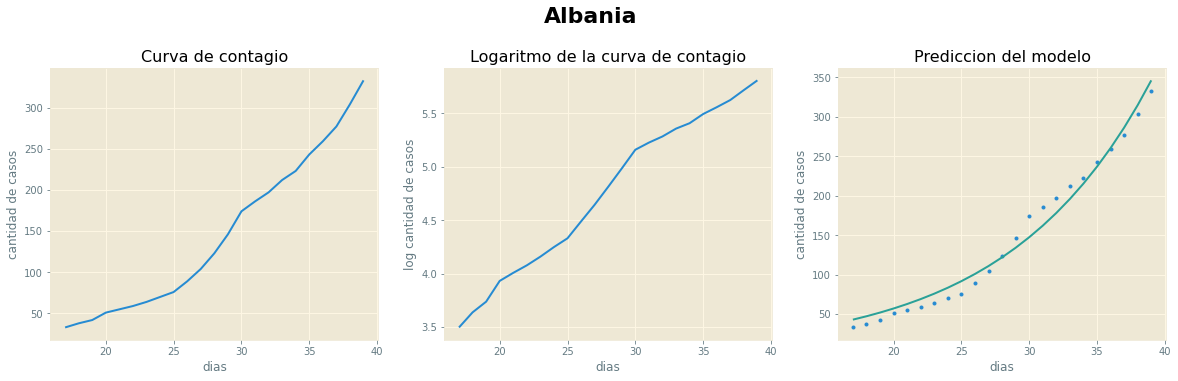

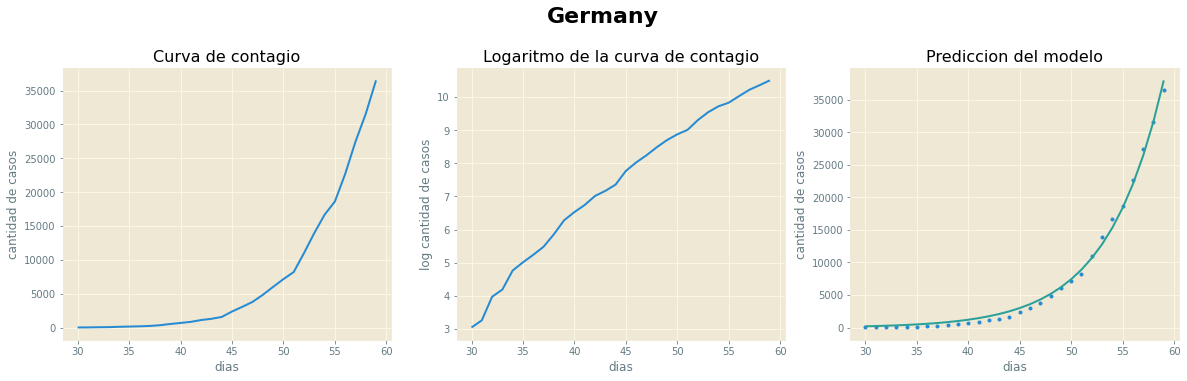

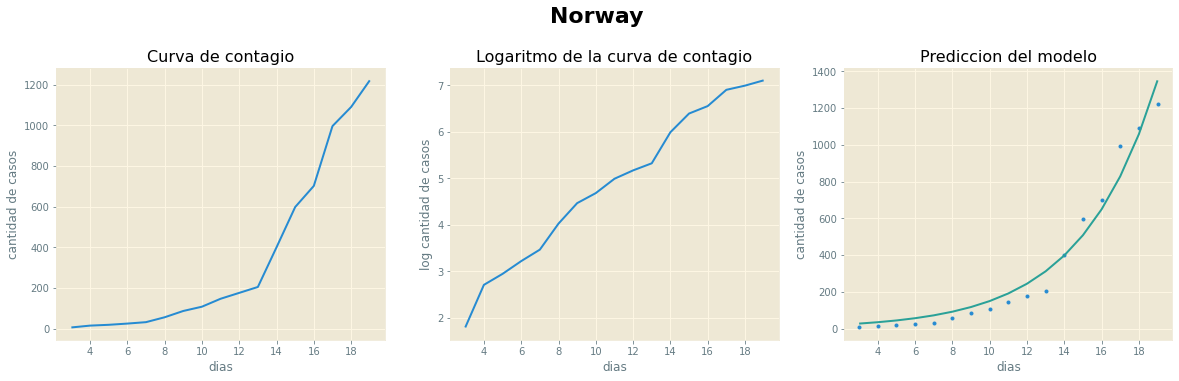

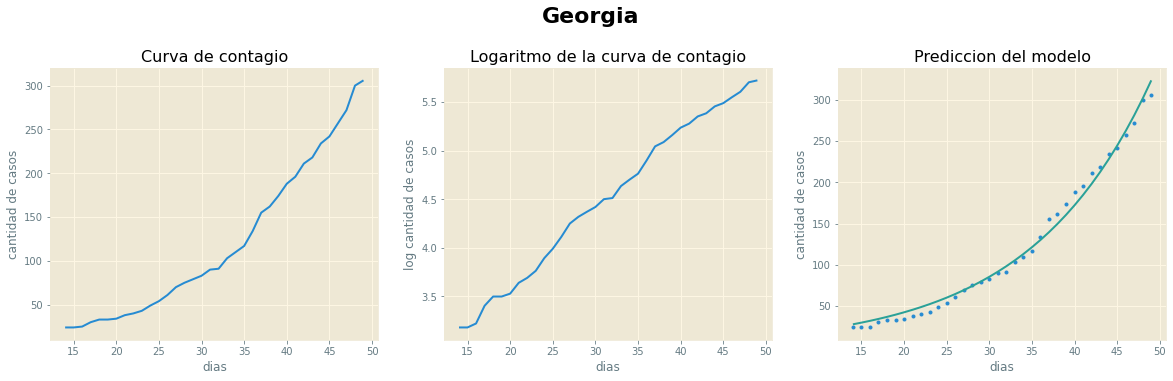

In [39]:
for i in range(len(rango)):
    plot_country(rango.iloc[i].Country, rango.iloc[i].t0, rango.iloc[i].tf)

## K por país

In [40]:
list = []

for i in range(len(rango)):

    df = info_country(rango.iloc[i].Country, rango.iloc[i].t0, rango.iloc[i].tf)
    list.append(df)

df_f = pd.concat(list)
df_f

,Pais,t0,t,k
0,Georgia,20,60,0.055993
0,Georgia,27,50,0.066546
0,Georgia,32,40,0.093923
0,Georgia,5,40,0.086606
0,Georgia,3,30,0.102814
0,Georgia,10,30,0.094688
0,Georgia,17,40,0.083108
0,Georgia,30,60,0.052615
0,Georgia,3,20,0.157486
0,Georgia,14,50,0.070124


In [41]:
val_k = df_f.k
val_k

0    0.055993
0    0.066546
0    0.093923
0    0.086606
0    0.102814
0    0.094688
0    0.083108
0    0.052615
0    0.157486
0    0.070124
Name: k, dtype: float64

In [42]:
# Obtenemos valores estadisticos

print(f"Media de k: { val_k.mean() }")
print(f"Mediana de k: { val_k.median() }")
print(f"Desvio estandar de k: { val_k.std() }")

Media de k: 0.08639019326995322
Mediana de k: 0.08485713160572156
Desvio estandar de k: 0.030154934054528838


El índice de contagio calculado para el grupo de países iniciales tuvo buen desempeño, con media y mediana de similar magnitud, 0.85. Y con desviación estándar de 0.03.

Text(0.5, 1.0, 'Distribucion de densidad de k')

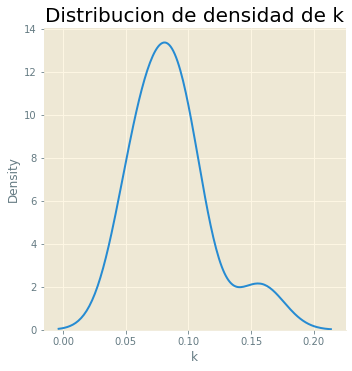

In [43]:
sns.displot(val_k, kind="kde")
plt.title("Distribucion de densidad de k", fontsize=20)

La distribución de densidad del índice de contagio presentó una buena distribución, con ligero sesgo a la derecha. Es decir con tendencia a aumentar la contagiosidad.

In [44]:
def bootstrap_simplificado(dataset, B=100):
    boots = []
    for _ in range(B):
        boots.append(np.random.choice(dataset, size=len(dataset)))
    return np.array(boots)

k_final=0.08628528612084012


Text(0, 0.5, 'Muestras')

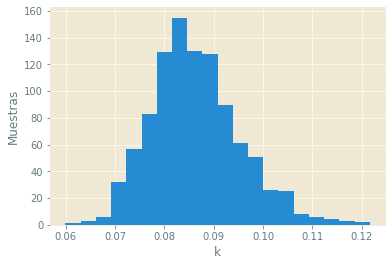

In [45]:
# Bootstrapping

datos_boots = bootstrap_simplificado(val_k,1000)
alpha = 1
medias = np.apply_along_axis(func1d=np.mean, axis=1, arr=datos_boots)
medias.sort()
k_final = medias.mean()
print(f"k_final={medias.mean()}")
plt.hist(medias, bins=20)
plt.xlabel("k")
plt.ylabel("Muestras")

Se corrobora la distribución de los valores de K obtenidos. Se oberva buena distribución.

In [46]:
# Construccion del intervalo de confianza
inferior = np.percentile(medias, alpha/2)
superior = np.percentile(medias, (100-alpha/2))
intervalo_confianza = [inferior, superior]
print(f"Con una certeza del 95% el valor del k promedio se encuentra en el intervalo: {intervalo_confianza}")

Con una certeza del 95% el valor del k promedio se encuentra en el intervalo: [0.06762564527108882, 0.11437545873138781]


## K Mundial

Despues de varios ensayo y error se obtiene el siguiente rango de días para la curva del mundo...

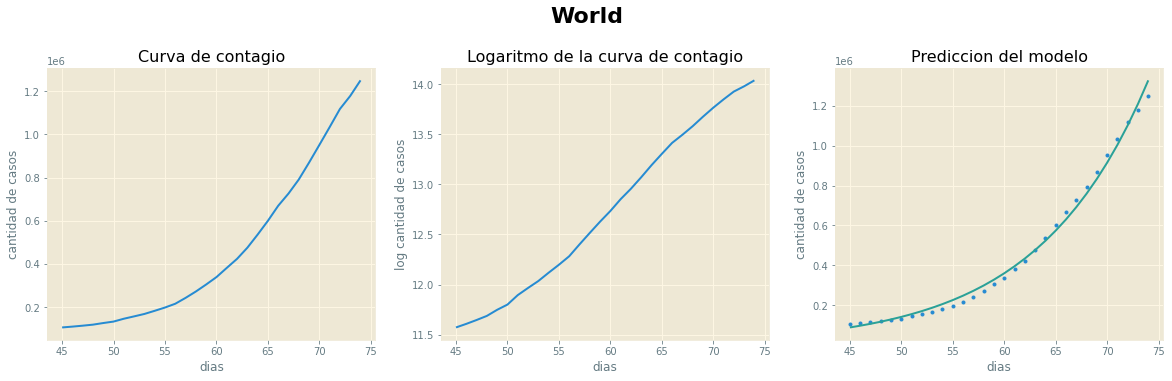

In [47]:
t0_world = 45
tt_world = 75
plot_country('World', t0_world, tt_world)

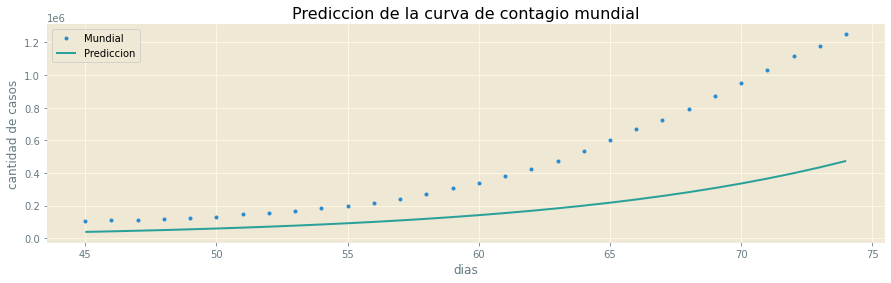

In [48]:
# Probamos el k promedio que habiamos calculado para predecir el comportamiento de la curva de contagio mundial.

df = owid_covid_data

countries_data_world = df['location']
cases_data_world = df['total_cases']

ind_world=np.where(countries_data_world=='World')
ind_world=ind_world[0]
cases_world=cases_data_world[ind_world]
cases_start=cases_world[t0_world:tt_world]
days_start=days[t0_world:tt_world]
popt, pcov = curve_fit(exponencial, days_start, cases_start)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(days_start,k,t0)


cases_simu=exponencial(days_start,k_final,t0)

plt.figure(figsize=(15,4))
plt.plot(days_start,cases_start,'.', label="Mundial")
plt.plot(days_start,cases_simu, label="Prediccion")
plt.title("Prediccion de la curva de contagio mundial")
plt.xlabel('dias') 
plt.ylabel('cantidad de casos')
plt.legend()

In [49]:
# RMSE
rmse = mean_squared_error(cases_start, cases_simu)
print(np.format_float_scientific(rmse, precision = 1, exp_digits=3))

1.4e+011


El valor de RMSE obtenido es de 130 mil millones de contagios, lo cual es totalmente absurdo.\
Era de esperarse que aplicar K de un grupo de países en una estimación mundial daría errores altos, ya que cada país tuvo factores que afectaron el nivel de contagiosidad, tales como:\
\
    -Políticas utilizadas (vacunas, cuarentena, resctriciones de vuelos)\
    -Posición geográfica\
    -Estaciones climáticas\
    -Situación Económica
    -Factores Culturales, entre otros.

# Estrategias

## Selección de Países

La siguiente función une el dataset del total de casos y el dataset de aplicación de cuarentena. La idea es chequear como secomportó la curva de contagios en base a la aplicación o no de las cuarentenas. Esto con la intención de agrupar los países a analizar...

In [50]:
def plot_country_qua(country):
    
    #Unimos los dos datasets (casos y cuarentena)
    
    df = data_original[data_original['location']==country][['date','location','total_cases']].reset_index(drop=True)
    df["date"]=pd.to_datetime(df["date"])

    #data de cuarentena
    df_cuarentena = data_cuarentena[data_cuarentena['location']==country][['date','location','stay_home_requirements']].reset_index(drop=True)
    df_cuarentena["date"] = pd.to_datetime(df_cuarentena["date"])
    df_cuarentena.drop(columns=['location'], inplace=True)
    

    #Uniendo ambas datas
    merged_data = pd.merge(df, df_cuarentena, on="date", how="left")
    
    #****************************************************************************************
    #Ajustmos la data
    countries_data_qua = merged_data['location']
    qua_data = merged_data['stay_home_requirements']
    qua_data[np.where(countries_data_qua==country)[0]]
    
    #****************************************************************************************
    #Graficamos

    plt.figure(figsize=(15,7))

    plt.subplot(2,1,1)
  
    cases=cases_data[np.where(countries_data==country)[0]]
    days=np.arange(0,len(cases))
    plt.plot(days,cases)
    plt.title('Casos ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de Casos')
    

    ax = plt.subplot(2,1,2)
    cases_qua = qua_data[np.where(countries_data_qua==country)[0]]
    days=np.arange(0,len(cases_qua))
    plt.plot(days,cases_qua)
    plt.title('Aplicación de Cuarentena ' + country)
    plt.xlabel('Dias')
    plt.ylabel('Cuarentena Si / No')
    qua_per = 100*df_cuarentena[df_cuarentena['stay_home_requirements']==1]['stay_home_requirements'].count()/(df_cuarentena[df_cuarentena['stay_home_requirements']==0]['stay_home_requirements'].count()+df_cuarentena[df_cuarentena['stay_home_requirements']==1]['stay_home_requirements'].count())
    qua_per_text = 'Quarentine Applied: ''{:.0f}'.format(qua_per) + ' %'
    plt.text(0.5,0.5,qua_per_text,horizontalalignment='center',verticalalignment='center', transform = ax.transAxes)
    
    plt.tight_layout()
    plt.show()

La función tiene el cálculo de porcentaje de tiempo en cuarentena, esto con la intención de evaluar el nivel de aplicación.\
Revisemos un par de países con distintos porentajes de aplicació de esta medida.

**Zimbabwe En Cuarentena**

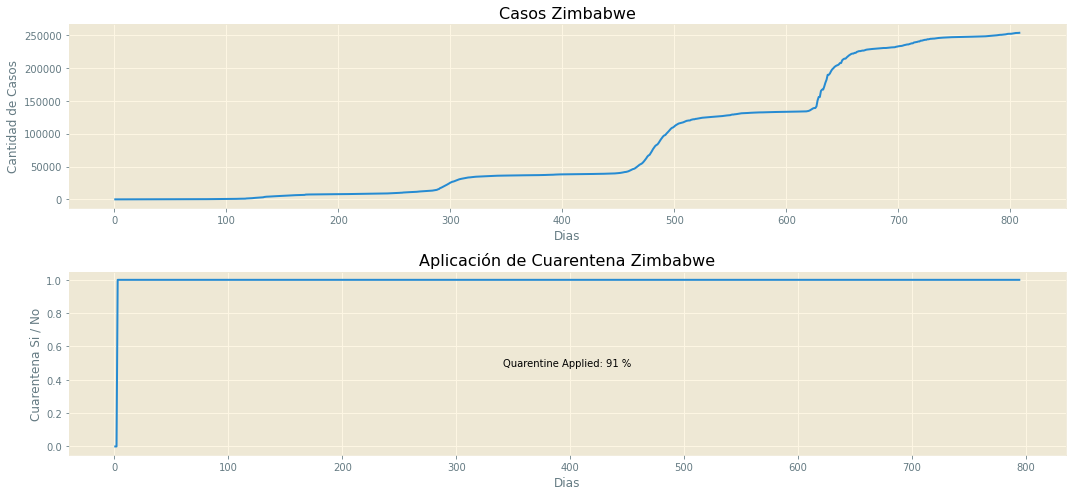

In [51]:
plot_country_qua('Zimbabwe')

Se observa aplicación de un 91% de tiempo en cuarentena, ya que Zimbabwe tuvo una fuerte tendencia al sostenimiento de la acuarentena.

Veamos ahora **United Arab Emirates**...

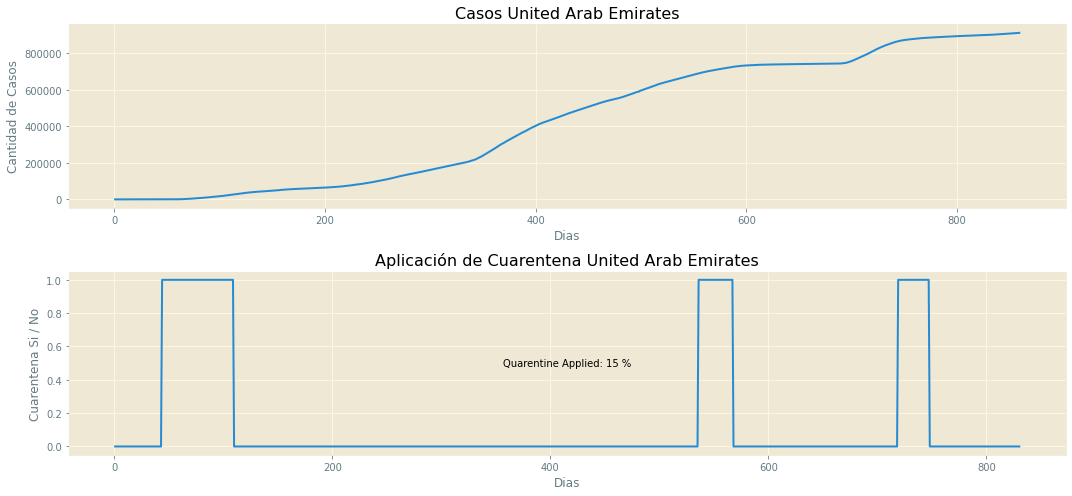

In [52]:
plot_country_qua('United Arab Emirates')

Se observa leve aplicación de 15 % del tiempo en cuarentena.\
Tomemos estos valores como referencia para categorizar como: Aplicó cuaretena y no aplicó.\
    -Zimbabwe: 91 %\
    -United Arab Emirates: 15 %\
Podriamos decir que se puede tomar 50% como umbral.

Hagamos una función para ver el porcentaje de cuarentena por paises...

In [53]:
list_of_countries = data_original['location'].unique()
# list_of_countries

dict = {'Location':[],'Quaren %':[]}
df_qua = pd.DataFrame(dict)

for country in list_of_countries:
    
    #Unimos los dos datasets (casos y cuarentena)
    
    df = data_original[data_original['location']==country][['date','location','total_cases']].reset_index(drop=True)
    df["date"]=pd.to_datetime(df["date"])

    #data de cuarentena
    df_cuarentena = data_cuarentena[data_cuarentena['location']==country][['date','location','stay_home_requirements']].reset_index(drop=True)
    df_cuarentena["date"] = pd.to_datetime(df_cuarentena["date"])
    df_cuarentena.drop(columns=['location'], inplace=True)
    
    #Uniendo ambas datas
    merged_data = pd.merge(df, df_cuarentena, on="date", how="left")
    
    #****************************************************************************************
    #Ajustmos la data
    countries_data_qua = merged_data['location']
    qua_data = merged_data['stay_home_requirements']
    qua_data[np.where(countries_data_qua==country)[0]]
    
    #****************************************************************************************
    #Calculamos % de cuarentena:

    
    qua_per = 100*df_cuarentena[df_cuarentena['stay_home_requirements']==1]['stay_home_requirements'].count()/(df_cuarentena[df_cuarentena['stay_home_requirements']==0]['stay_home_requirements'].count()+df_cuarentena[df_cuarentena['stay_home_requirements']==1]['stay_home_requirements'].count())
    qua_per_text = 'Quarentine Applied: ''{:.0f}'.format(qua_per) + ' %'
    #     print(country + ' ' + qua_per_text) 
    
    item_to_add = {'Location':country,'Quaren %':qua_per}


    df_qua = df_qua.append(item_to_add, ignore_index=True)

In [54]:
df_qua

,Location,Quaren %
0,Afghanistan,19.816724
1,Africa,NaN
2,Albania,81.405896
3,Algeria,64.864865
4,Andorra,18.192220
...,...,...
239,Western Sahara,NaN
240,World,NaN
241,Yemen,76.585928
242,Zambia,22.883295


### Paises con Cuarentena

Revisemos los que aplicaron cuarentena entre 70 y 90 %

In [55]:
df_qua[df_qua['Quaren %'].between(70,90)]

,Location,Quaren %
2,Albania,81.405896
5,Angola,87.060159
8,Argentina,75.286041
15,Bahamas,83.220721
16,Bahrain,81.214848
21,Belize,79.481398
24,Bhutan,81.464531
37,Canada,89.639640
38,Cape Verde,87.500000
44,Colombia,80.227273


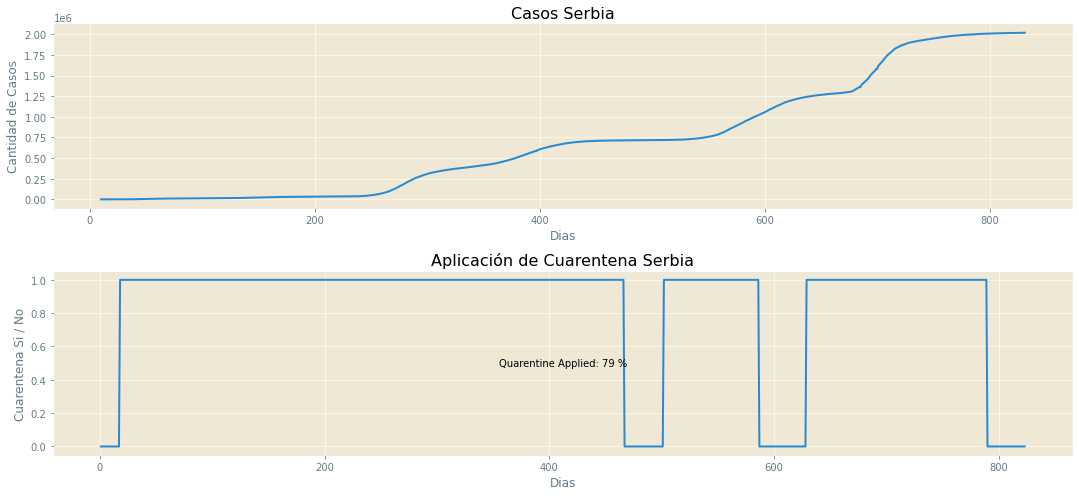

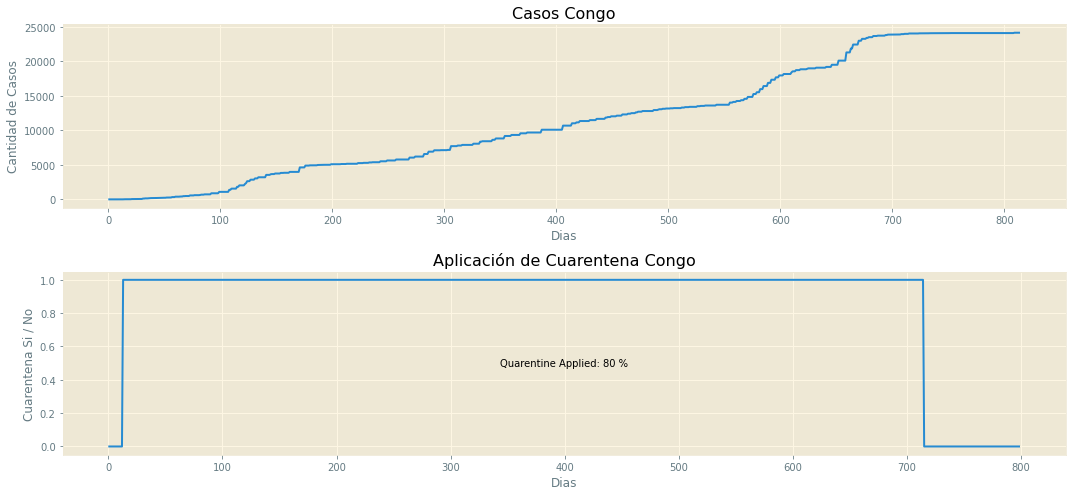

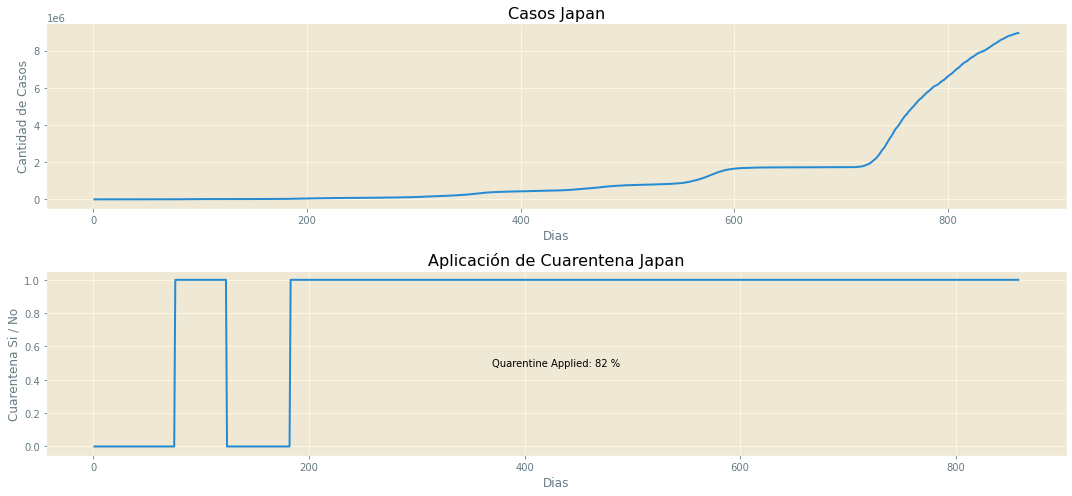

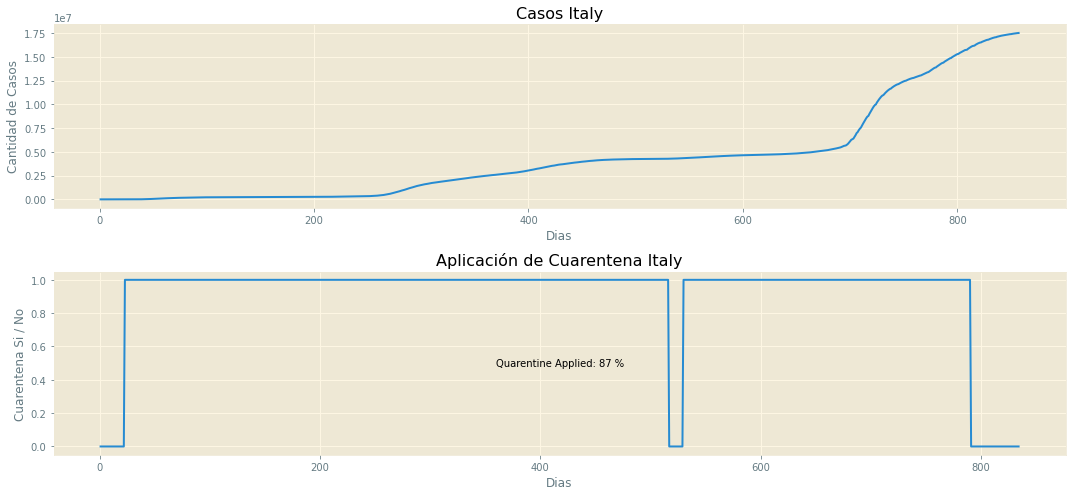

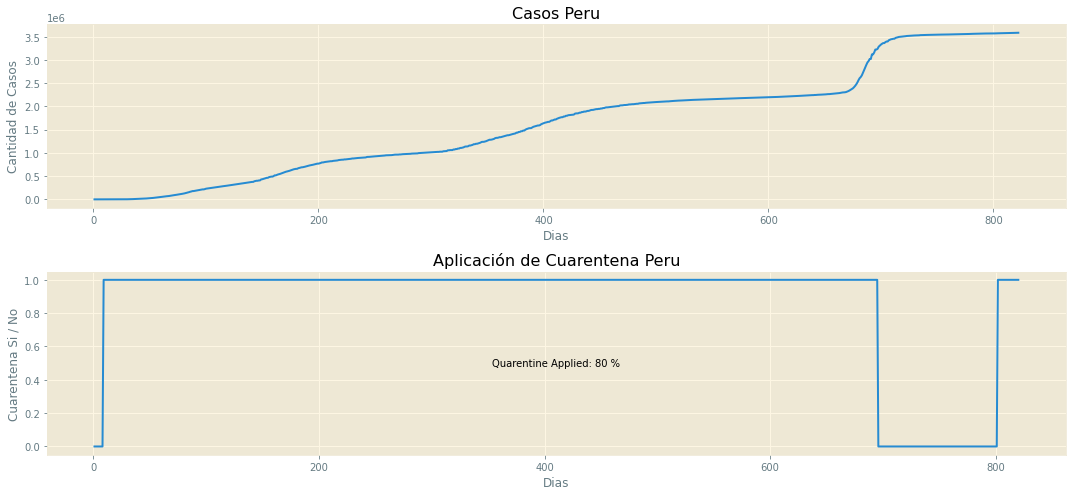

In [56]:
# countries_with_qurentine = ['China', 'Congo', 'Honduras', 'Italy', 'Peru']
countries_with_qurentine = ['Serbia', 'Congo', 'Japan', 'Italy', 'Peru']
for country in countries_with_qurentine:
    plot_country_qua(country)

### Paises Sin Cuarentena

In [57]:
df_qua[df_qua['Quaren %'].between(10,30)]

,Location,Quaren %
0,Afghanistan,19.816724
4,Andorra,18.192220
22,Benin,22.997712
32,Bulgaria,11.021814
33,Burkina Faso,24.324324
50,Croatia,20.157658
54,Czechia,28.376844
57,Djibouti,17.934166
65,Estonia,12.428734
67,Ethiopia,22.902494


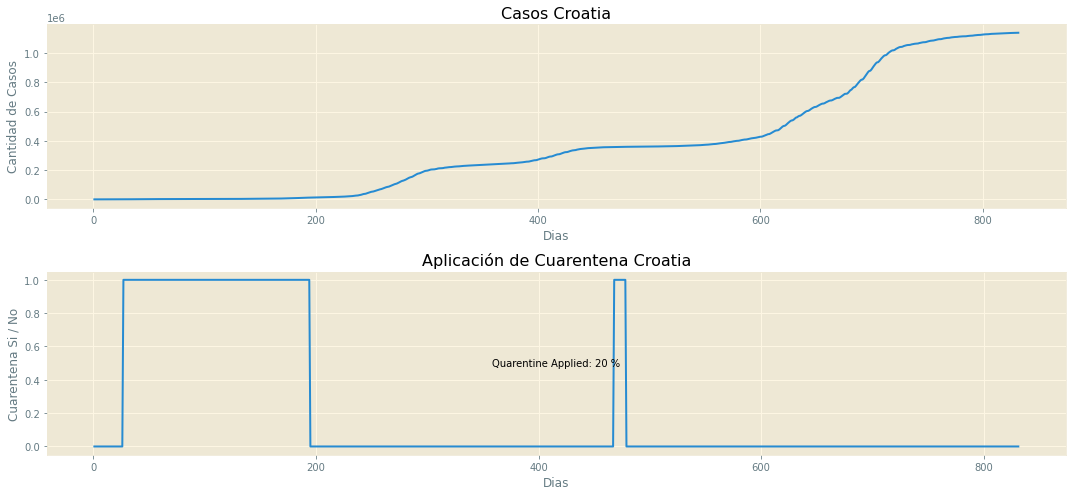

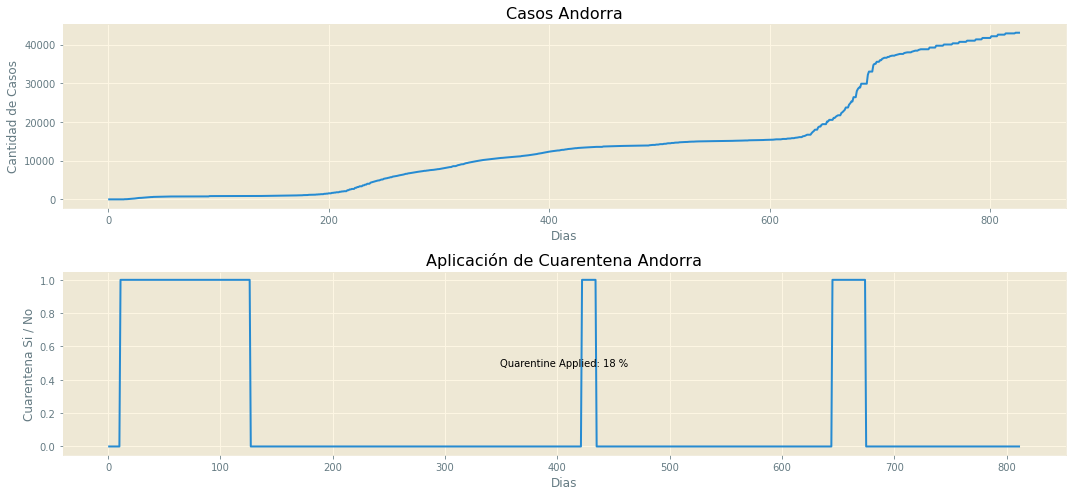

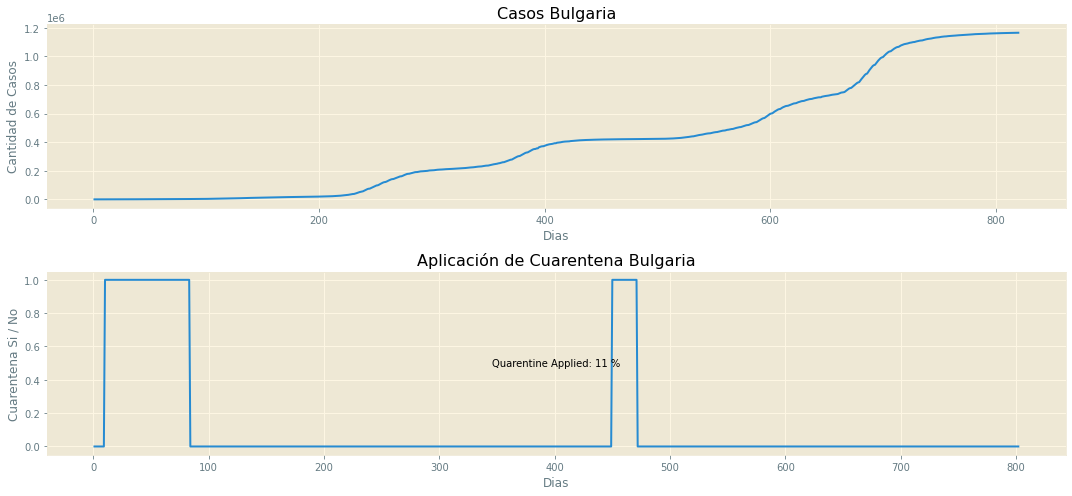

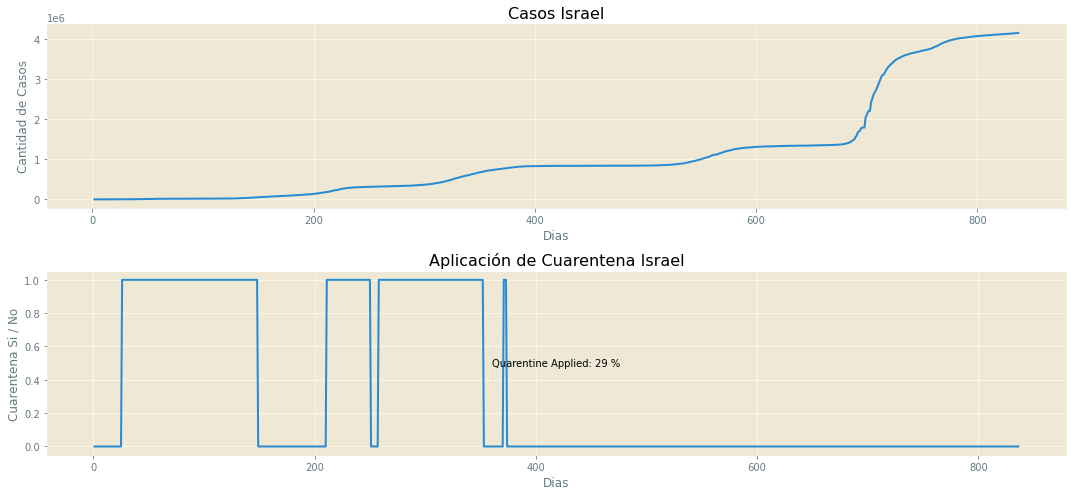

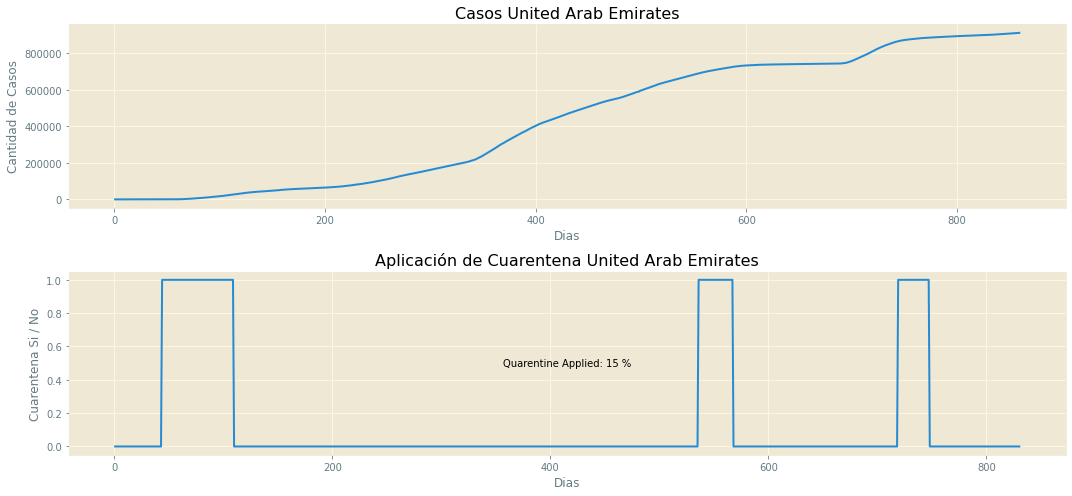

In [58]:
# countries_without_qurentine = ['United States', 'Angola', 'Ecuador', 'Israel', 'Portugal']
countries_without_qurentine = ['Croatia', 'Andorra', 'Bulgaria', 'Israel', 'United Arab Emirates']
for country in countries_without_qurentine:
    plot_country_qua(country)

De lo anterior...

In [59]:
countries_with_qurentine
countries_without_qurentine

countries_qua = countries_with_qurentine + countries_without_qurentine
countries_qua

['Serbia',
 'Congo',
 'Japan',
 'Italy',
 'Peru',
 'Croatia',
 'Andorra',
 'Bulgaria',
 'Israel',
 'United Arab Emirates']

## Selección de Indicadores


**new_cases_smoothed_per_million** = Nuevos casos de COVID-19 (Media movil de 7 dias) por 1,000,000 habitantes. El contado incluye casos probables cuando son reportados.

**reproduction_rate** = Estimación en tiempo real del R (factor de reproduccion) efectivo del COVID-19

**stringency_index** = Indice de Rigurosidad de la Respuesta del Gobierno: es una medida compuesta basada en 9 indicadores que incluyen: cierres de escuelas, cierres de espacios de trabajo, prohibicion del transporte publico, etc. Esta reescalado a un valor entre 0 y 100, siendo 100 el valor de mas estricto.

**Data de los Paises con los features seleccionados**

In [60]:
countries_data2 = data_original[(data_original.location.isin(countries_qua))]
datos_paises = data_original[data_original.location.isin(countries_qua)]
countries_data2 = countries_data2[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
countries_data2
#countries_data2[countries_data2['location']== 'Israel']

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
3349,Andorra,2020-03-02,NaN,NaN,0.0
3350,Andorra,2020-03-03,NaN,NaN,0.0
3351,Andorra,2020-03-04,NaN,NaN,0.0
3352,Andorra,2020-03-05,NaN,NaN,0.0
3353,Andorra,2020-03-06,NaN,NaN,0.0
...,...,...,...,...,...
180309,United Arab Emirates,2022-06-03,45.412,NaN,NaN
180310,United Arab Emirates,2022-06-04,46.742,NaN,NaN
180311,United Arab Emirates,2022-06-05,49.959,NaN,NaN
180312,United Arab Emirates,2022-06-06,52.761,NaN,NaN


**Matriz de Correlación**

Text(0.5, 1.0, 'Correlacion entre los indicadores')

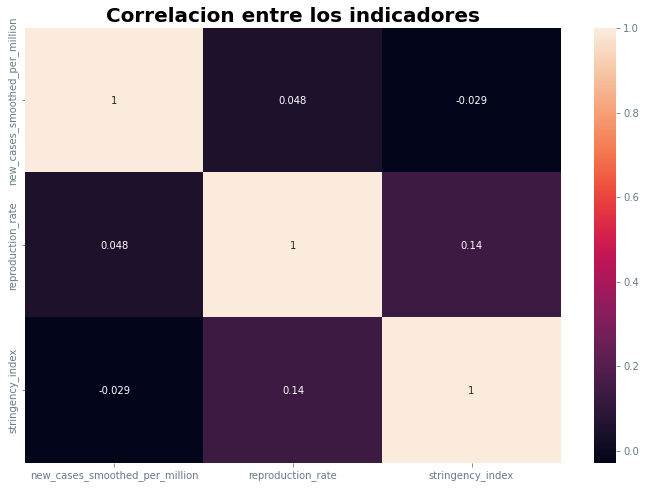

In [61]:
# Analisis de Correlacion entre los indicadores 

corr_df = countries_data2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True)
plt.title("Correlacion entre los indicadores", fontsize=20, fontweight="bold")

La matriz de correlación muestra muy baja relación entre las variables seleccionadas

## Modelo: 1 país

Se selecciona **United Arab Emirates** de la lista de paises

In [62]:
# cuaren_por = data_cuarentena[(data_cuarentena.Entity == "Portugal")&(data_cuarentena.Day < "2022-05-01")&(data_cuarentena.Day >= "2020-03-03")]
cuaren_por = data_cuarentena[(data_cuarentena.location == "United Arab Emirates")]
cuaren_por.set_index("date", inplace=True)
cuaren_por

,location,stay_home_requirements
date,,
2020-01-01,United Arab Emirates,0
2020-01-02,United Arab Emirates,0
2020-01-03,United Arab Emirates,0
2020-01-04,United Arab Emirates,0
2020-01-05,United Arab Emirates,0
...,...,...
2022-05-05,United Arab Emirates,0
2022-05-06,United Arab Emirates,0
2022-05-07,United Arab Emirates,0


Text(0.5, 0.5, 'Quarentine Applied: 15 %')

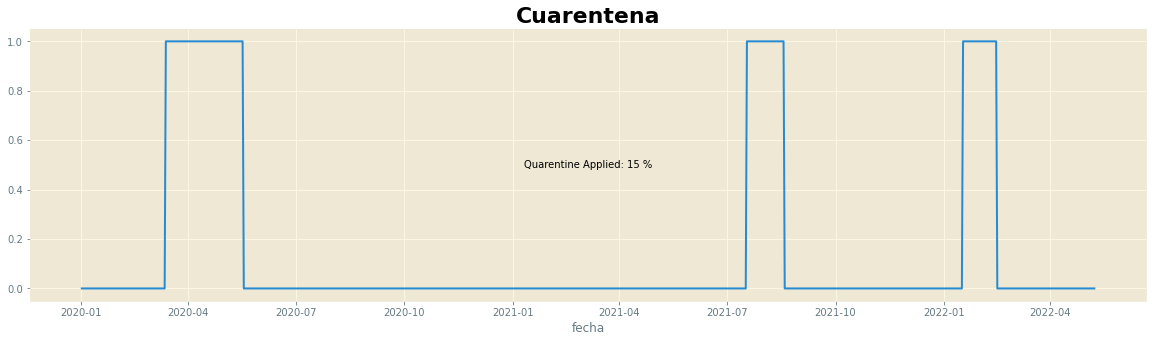

In [63]:
plt.figure(figsize=(20,5))
ax=plt.subplot()
plt.plot(cuaren_por.stay_home_requirements)
plt.title("Cuarentena", fontsize= 22, fontweight="bold")
plt.xlabel("fecha")
qua_per = 100*cuaren_por[cuaren_por['stay_home_requirements']==1]['stay_home_requirements'].count()/(cuaren_por[cuaren_por['stay_home_requirements']==0]['stay_home_requirements'].count()+cuaren_por[cuaren_por['stay_home_requirements']==1]['stay_home_requirements'].count())
qua_per_text = 'Quarentine Applied: ''{:.0f}'.format(qua_per) + ' %'
plt.text(0.5,0.5,qua_per_text,horizontalalignment='center',verticalalignment='center', transform = ax.transAxes)


In [64]:
dt_por = countries_data2[(countries_data2.location == "United Arab Emirates")]
dt_por.drop(columns="location", inplace=True)
dt_por.dropna(inplace=True)
dt_por.set_index("date", inplace=True)
dt_por["y_cuarentena"] = cuaren_por.stay_home_requirements
dt_por

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-03-19,0.786,1.45,45.37,1
2020-03-20,0.786,1.39,45.37,1
2020-03-21,0.972,1.48,45.37,1
2020-03-22,0.786,1.62,45.37,1
2020-03-23,1.430,1.92,62.04,1
...,...,...,...,...
2022-05-05,22.763,0.95,37.96,0
2022-05-06,21.805,0.97,37.96,0
2022-05-07,20.804,1.01,37.96,0


# Data

Organizamos el dataset de manera de facilitar el tanteo con distintos países:

In [65]:
country = ['United Arab Emirates']

#Establecemos lista de paises
countries_with_qurentine = ['world','Serbia', 'Congo', 'Japan', 'Italy', 'Peru']
countries_without_qurentine = ['Croatia', 'Andorra', 'Bulgaria', 'Israel', 'United Arab Emirates']

#Creamos lista master de paises
countries_qua = countries_with_qurentine + countries_without_qurentine

#Creamos dataframe principal
countries_data2 = data_original[(data_original.location.isin(countries_qua))]
datos_paises = data_original[data_original.location.isin(countries_qua)]
countries_data2 = countries_data2[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]

#Leemeos del principal solo un pais
data = countries_data2[(countries_data2.location.isin(country))]
data.drop(columns="location", inplace=True)
data.dropna(inplace=True)
data.set_index("date", inplace=True)

#Leemos la data cuarentena de ese pais
cuaren_por = data_cuarentena[(data_cuarentena.location.isin(country))]
cuaren_por.set_index("date", inplace=True)

#Traemos columna cuarentena a casos pais
data["y_cuarentena"] = cuaren_por.stay_home_requirements
dt_por = data
dt_por

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-03-19,0.786,1.45,45.37,1
2020-03-20,0.786,1.39,45.37,1
2020-03-21,0.972,1.48,45.37,1
2020-03-22,0.786,1.62,45.37,1
2020-03-23,1.430,1.92,62.04,1
...,...,...,...,...
2022-05-05,22.763,0.95,37.96,0
2022-05-06,21.805,0.97,37.96,0
2022-05-07,20.804,1.01,37.96,0


In [66]:
dt_por['y_cuarentena'].unique()

array([1, 0])

In [67]:
# Se verifica que no haya cantidades importantes de valores nulos para el país seleccionado
dt_por.isna().sum()

new_cases_smoothed_per_million    0
reproduction_rate                 0
stringency_index                  0
y_cuarentena                      0
dtype: int64

In [68]:
# Se eliminan las filas con nulos, en caso que existan:
dt_por.dropna(inplace=True)
dt_por.isna().sum()

new_cases_smoothed_per_million    0
reproduction_rate                 0
stringency_index                  0
y_cuarentena                      0
dtype: int64

In [69]:
dt_por

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-03-19,0.786,1.45,45.37,1
2020-03-20,0.786,1.39,45.37,1
2020-03-21,0.972,1.48,45.37,1
2020-03-22,0.786,1.62,45.37,1
2020-03-23,1.430,1.92,62.04,1
...,...,...,...,...
2022-05-05,22.763,0.95,37.96,0
2022-05-06,21.805,0.97,37.96,0
2022-05-07,20.804,1.01,37.96,0


### MODELO Regresión Logística

Definamos una función que nos ayude a obtener evaluación de la métrica F Score...

In [70]:
def puntajes(X_test, X_train, y_test, y_test_pred, model):
  print("AC SCORE TRAIN:",accuracy_score(y_train, y_train_pred))
  print("AC SCORE TEST:",accuracy_score(y_test, y_test_pred))
  print("F1 SCORE: ", (f1_score(y_test, y_test_pred, average="weighted")))
  plot_confusion_matrix(model, X_test, y_test, values_format=".0f") 

Se definen los features y la variable a predecir (con el ejemplo de United Arab Emirates)...

In [71]:
X = dt_por.drop(columns=["y_cuarentena"])
y = dt_por.y_cuarentena

Separamos test y train...

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1984)

### Se evalúa un modelo BENCHMARK de Regresió Logística

AC SCORE TRAIN: 0.9049360146252285
AC SCORE TEST: 0.9106382978723404
F1 SCORE:  0.8919949937421776


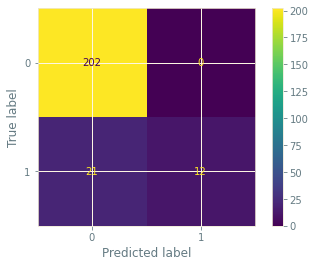

In [73]:
# Se corre un modelo de Regresión Logística con hiperparámetros por defecto. Se considera el modelo BENCHMARK
logreg_test = LogisticRegression()
logreg_test.fit(X_train, y_train)
y_test_pred= logreg_test.predict(X_test)
y_train_pred= logreg_test.predict(X_train)
puntajes(X_test, X_train, y_test, y_test_pred, logreg_test)

Se aprecia un buen desempeño del modelo Benchmark, con F1 SCORE= 0.89.

Se crea el modelo de Regresión Logística a optimizar

In [74]:
#Creamos el modelo de regresión
logreg = LogisticRegression()

#Grilla de hiperparametros
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001,  0.01, 0.1,  1 , 10, 100 , 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

#Asignamos parametros al modelo
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)

#Entrenamos
model.fit(X_train, y_train)

#Obtenemos mejores parámetros
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9068013468013468


Se toman los hiperparámetros del mejor modelo y se evalúa este último.

AC SCORE TRAIN: 0.9049360146252285
AC SCORE TEST: 0.9106382978723404
F1 SCORE:  0.8919949937421776


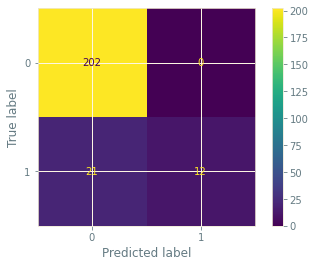

In [75]:
#Creamos el modelo con los parámetros del paso anterior
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

#Corremos sobre train y test
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

#Evaluamos
puntajes(X_test, X_train, y_test, y_test_pred, logreg)

Se observa buen F Score de 89%. Además, el score muestra ausencia de sesgo entre train y test.

In [76]:
# Se crea una tabla de métricas obtenidas:
print('TABLA DE MÉTRICAS RESULTANTES')
t_scores= pd.DataFrame({'CANT PAÍSES TRAIN': [1,1],
                        'CANT PAÍSES TEST': [1,1],
                        'MODELO': ['BENCHMARK', 'Reg Logística'],
                        'SCORE': [0.89,0.89]})
t_scores

TABLA DE MÉTRICAS RESULTANTES


,CANT PAÍSES TRAIN,CANT PAÍSES TEST,MODELO,SCORE
0,1,1,BENCHMARK,0.89
1,1,1,Reg Logística,0.89


A continuación de grafica la predicción, en contraste con los datos concretos de la política de cuarentena:

Text(0.5, 0.5, 'Quarentine Applied: 15 %')

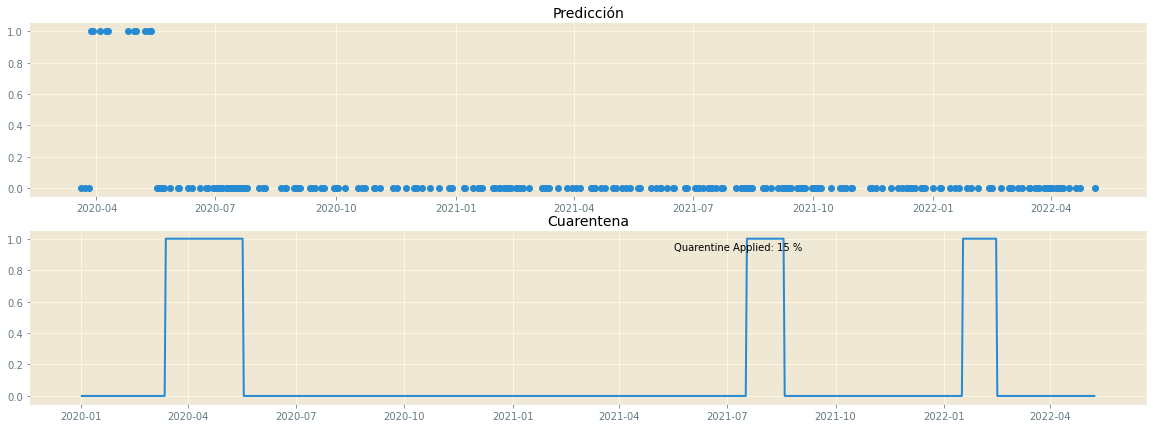

In [77]:
plt.figure(figsize=(20,7))

plt.subplot(2,1,1)
plt.scatter(X_test.index, y_test_pred)
plt.title("Predicción", fontsize=14)

plt.subplot(2,1,2)
# plt.figure(figsize=(8,5))
plt.title("Cuarentena", fontsize=14)
plt.plot(cuaren_por.stay_home_requirements)
qua_per = 100*cuaren_por[cuaren_por['stay_home_requirements']==1]['stay_home_requirements'].count()/(cuaren_por[cuaren_por['stay_home_requirements']==0]['stay_home_requirements'].count()+cuaren_por[cuaren_por['stay_home_requirements']==1]['stay_home_requirements'].count())
qua_per_text = 'Quarentine Applied: ''{:.0f}'.format(qua_per) + ' %'
plt.text(0.3,0.5,qua_per_text,horizontalalignment='center',verticalalignment='center', transform = ax.transAxes)

Se observa buena correspondencia entre la aplicación de la cuarentena o no con respecto a la predicción.

Guardemos los datos en una tabla...

In [78]:
score_por = logreg.score(X_test, y_test)
w0 = logreg.intercept_[0]
w = w1, w2, w3 = logreg.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3)" % (w0, w1, w2, w3)
print(equation)

model_por_ec = pd.DataFrame({"Pais":"United Arab Emirates","w0":[w0], "w1":[w1], "w2":[w2], "w3":[w3], "Score":[score_por]})
model_por_ec

y = -9.692798 + (0.003769 * x1) + (0.179362 * x2) + (0.123716 * x3)


,Pais,w0,w1,w2,w3,Score
0,United Arab Emirates,-9.692798,0.003769,0.179362,0.123716,0.910638


Veamos la importancia de los features seleccionados en el modelo...

                          feature  importance
1               reproduction_rate    1.196454
2                stringency_index    1.131695
0  new_cases_smoothed_per_million    1.003776


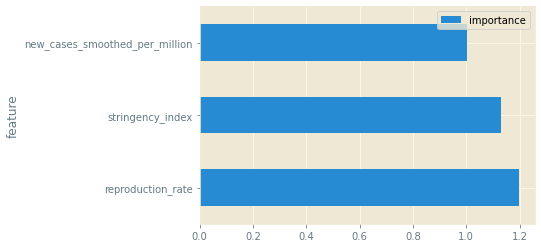

In [79]:
feature_names = ["new_cases_smoothed_per_million","reproduction_rate","stringency_index"]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

**stringency_index** resulta ser el de mayor importancia con más de 1.

. 


Hasta aquí se hizo una primera evaluación en base a datos solo de Emiratos Arabes Unidos, entre los disponibles en el dataset.

## Modelo: 10 paises- GRUPO A

En esta sección se repite el procedimiento, incorporando más países y volviendo a determinar un modelo optimizado de Regresión Logística.

In [80]:
countries_quarentine_data = data_cuarentena[data_cuarentena.location.isin(countries_qua)]
countries_quarentine_data.set_index("date", inplace=True)

In [81]:
list = []

for i in countries_qua:

    dt = countries_data2[(countries_data2.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = countries_quarentine_data[countries_quarentine_data.location == i].stay_home_requirements
    list.append(dt)

dt_modelo = pd.concat(list)
dt_modelo

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-02-26,0.000,0.0,13.89,0.0
2020-02-27,0.000,0.0,13.89,0.0
2020-02-28,0.000,0.0,13.89,0.0
2020-02-29,0.000,0.0,13.89,0.0
2020-03-01,0.000,0.0,13.89,0.0
...,...,...,...,...
2022-06-03,45.412,0.0,0.00,NaN
2022-06-04,46.742,0.0,0.00,NaN
2022-06-05,49.959,0.0,0.00,NaN


In [82]:
dt_modelo.reset_index(drop=True)

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
0,0.000,0.0,13.89,0.0
1,0.000,0.0,13.89,0.0
2,0.000,0.0,13.89,0.0
3,0.000,0.0,13.89,0.0
4,0.000,0.0,13.89,0.0
...,...,...,...,...
8378,45.412,0.0,0.00,NaN
8379,46.742,0.0,0.00,NaN
8380,49.959,0.0,0.00,NaN
8381,52.761,0.0,0.00,NaN


In [83]:
dt_modelo.isna().sum()

new_cases_smoothed_per_million      0
reproduction_rate                   0
stringency_index                    0
y_cuarentena                      120
dtype: int64

In [84]:
dt_modelo.dropna(inplace=True)
dt_modelo

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-02-26,0.000,0.00,13.89,0.0
2020-02-27,0.000,0.00,13.89,0.0
2020-02-28,0.000,0.00,13.89,0.0
2020-02-29,0.000,0.00,13.89,0.0
2020-03-01,0.000,0.00,13.89,0.0
...,...,...,...,...
2022-05-05,22.763,0.95,37.96,0.0
2022-05-06,21.805,0.97,37.96,0.0
2022-05-07,20.804,1.01,37.96,0.0


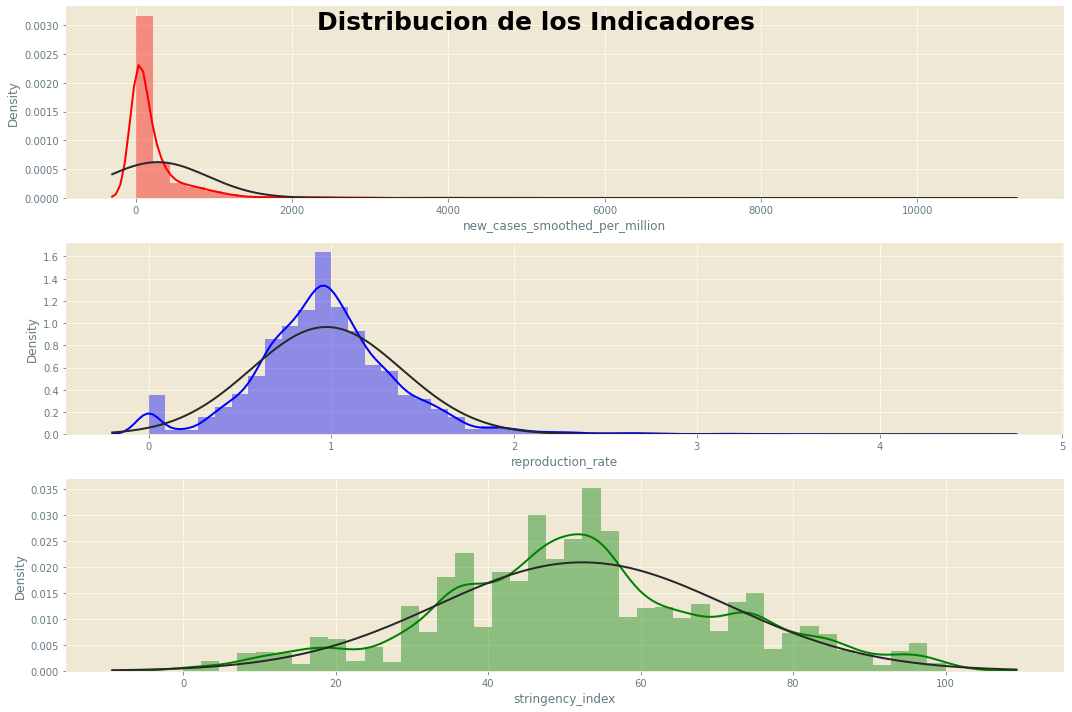

In [85]:

#distribuciones
fig, axes = plt.subplots(3, figsize=(15,10))

fig.suptitle('Distribucion de los Indicadores', fontsize="25", fontweight="bold")

sns.distplot(ax=axes[0], a=dt_modelo.new_cases_smoothed_per_million,fit=norm, kde=True,color= "r")
sns.distplot(ax=axes[1], a=dt_modelo.reproduction_rate,fit=norm, kde=True, color= "b")
sns.distplot(ax=axes[2], a=dt_modelo.stringency_index,fit=norm, kde=True,  color= "g")

plt.tight_layout()

### Regresion Logistica

Se crean los datos para entrenar y evaluar el modelo:

In [86]:
X = dt_modelo.drop(columns=["y_cuarentena"])
y = dt_modelo.y_cuarentena

Se hace train/ test split:

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

Se define el modelo y se optimiza mediante método GridSearchCV:

In [88]:
#Creamos el objeto
logreg = LogisticRegression()

#Establecemos grilla de hiperparametros
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001,  0.01, 0.1,  1 , 10, 100 , 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

#Creamos el modelo con los hiperparámetros
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  

#Entrenamos sobre train
model.fit(X_train, y_train)

#Obtenemos hiperparámetros
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7038423842563543


Se evalúa modelo con mejores parámetros:

In [89]:
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Evaluamos sobre train y test...

In [90]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

Se grafica a continuación la matriz de confusión del caso:

AC SCORE TRAIN: 0.7060857538035962
AC SCORE TEST: 0.7139975796692215
F1 SCORE:  0.7115834875719445


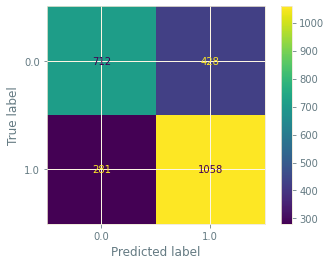

In [91]:
puntajes(X_test,X_train,y_test, y_test_pred, logreg)

In [92]:
# Se crea una tabla de métricas obtenidas:
print('TABLA DE MÉTRICAS RESULTANTES')
t_scores= pd.DataFrame({'CANT PAÍSES TRAIN': [1,1,10],
                        'CANT PAÍSES TEST': [1,1,10],
                        'MODELO': ['BENCHMARK', 'Reg Logística', 'Reg Logística'],
                        'SCORE': [0.89,0.89, 0.71]})
t_scores

TABLA DE MÉTRICAS RESULTANTES


,CANT PAÍSES TRAIN,CANT PAÍSES TEST,MODELO,SCORE
0,1,1,BENCHMARK,0.89
1,1,1,Reg Logística,0.89
2,10,10,Reg Logística,0.71


In [93]:
score_paises = logreg.score(X_test, y_test)
w0 = logreg.intercept_[0]
w = w1, w2, w3 = logreg.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3)" % (w0, w1, w2, w3)
print(equation)

model_paises_ec = pd.DataFrame({"Seleccion":"Paises","w0":[w0], "w1":[w1], "w2":[w2], "w3":[w3], "Score":[score_paises]})
model_paises_ec

y = -2.116657 + (-0.000888 * x1) + (-0.117301 * x2) + (0.051597 * x3)


,Seleccion,w0,w1,w2,w3,Score
0,Paises,-2.116657,-0.000888,-0.117301,0.051597,0.713998


Importancias de los indicadores

                          feature  importance
2                stringency_index    1.052951
0  new_cases_smoothed_per_million    0.999113
1               reproduction_rate    0.889318


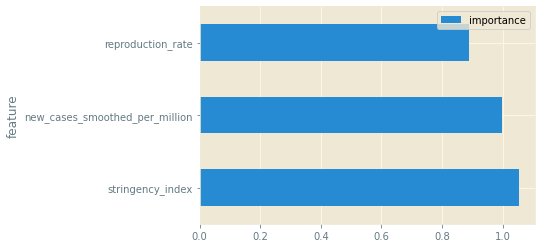

In [94]:
feature_names = ["new_cases_smoothed_per_million","reproduction_rate","stringency_index"]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

Al igual que en el modelo de United Arab Emirates, el feature 'sringency_index' resultó de mayor importancia, aunque en este caso 'new_cases_smoothed_per_million' aumentó de importancia.

### Naive Bayes

Como alternativa para considerar, se evalúa un modelo Naive Bayes optimizado:

In [95]:
gnb = GaussianNB()

In [96]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GridSearchCV(gnb,                    # model
                   param_grid = params_NB,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

{'var_smoothing': 2.310129700083158e-06}
0.6725514100794234


Se evalúa dicho modelo con los mejores hiperparámetros determinados con GridSearchCV y grafica matriz de confusión

AC SCORE TRAIN: 0.6702973720608575
AC SCORE TEST: 0.6845502218636547
F1 SCORE:  0.6742790321525858


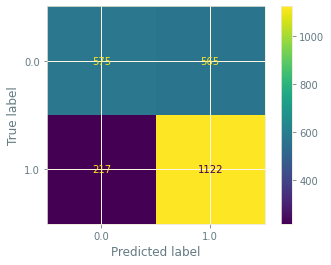

In [97]:
gnb = GaussianNB(**model.best_params_)
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)
puntajes(X_test,X_train,y_test, y_test_pred, gnb)

In [98]:
# Se crea una tabla de métricas obtenidas:
print('TABLA DE MÉTRICAS RESULTANTES')
t_scores= pd.DataFrame({'CANT PAÍSES TRAIN': [1,1,10,10],
                        'CANT PAÍSES TEST': [1,1,10,10],
                        'MODELO': ['BENCHMARK', 'Reg Logística', 'Reg Logística', 'Naives Bayes'],
                        'SCORE': [0.89,0.89, 0.71, 0.67]})
t_scores

TABLA DE MÉTRICAS RESULTANTES


,CANT PAÍSES TRAIN,CANT PAÍSES TEST,MODELO,SCORE
0,1,1,BENCHMARK,0.89
1,1,1,Reg Logística,0.89
2,10,10,Reg Logística,0.71
3,10,10,Naives Bayes,0.67


## Prueba en paises nuevos- GRUPO B

Se repite el proceso para un muestreo de 10 países distintos al caso anterior. La particularidad es que para la predicción se tiene en cuenta el modelo optimizado del caso de los primeros 10 países.

**Preparamos la data**

In [99]:
countries_qua2 = ['Brazil', 'India', 'Nigeria', 'Suriname', 'Zimbabwe', 'Guatemala', 'Netherlands', 'Slovenia', 'Trinidad and Tobago', 'Senegal']

In [100]:
countries_quarentine_data = data_cuarentena[data_cuarentena.location.isin(countries_qua2)]
countries_quarentine_data.set_index("date", inplace=True)

In [101]:
countries_data2 = data_original[(data_original.location.isin(countries_qua2)) & (data_original.date < "2022-05-01")]
countries_data2 = data_original[data_original.location.isin(countries_qua2)]
countries_data2 = countries_data2[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
countries_data2.date = pd.to_datetime(countries_data2.date)
countries_data2

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
24030,Brazil,2020-02-26,NaN,NaN,5.56
24031,Brazil,2020-02-27,NaN,NaN,5.56
24032,Brazil,2020-02-28,NaN,NaN,5.56
24033,Brazil,2020-02-29,NaN,NaN,5.56
24034,Brazil,2020-03-01,NaN,NaN,5.56
...,...,...,...,...,...
192296,Zimbabwe,2022-06-03,12.088,NaN,NaN
192297,Zimbabwe,2022-06-04,12.088,NaN,NaN
192298,Zimbabwe,2022-06-05,11.794,NaN,NaN
192299,Zimbabwe,2022-06-06,13.403,NaN,NaN


In [102]:
list = []

for i in countries_qua2:

    dt = countries_data2[(countries_data2.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = countries_quarentine_data[countries_quarentine_data.location == i].stay_home_requirements
    list.append(dt)

dt_modelo_2 = pd.concat(list)
dt_modelo_2

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-02-26,0.000,0.0,5.56,0.0
2020-02-27,0.000,0.0,5.56,0.0
2020-02-28,0.000,0.0,5.56,0.0
2020-02-29,0.000,0.0,5.56,0.0
2020-03-01,0.000,0.0,5.56,0.0
...,...,...,...,...
2022-06-03,0.208,0.0,26.85,0.0
2022-06-04,0.266,0.0,26.85,0.0
2022-06-05,0.224,0.0,26.85,0.0


In [103]:
dt_modelo_2.isna().sum()

new_cases_smoothed_per_million      0
reproduction_rate                   0
stringency_index                    0
y_cuarentena                      128
dtype: int64

In [104]:
dt_modelo_2.dropna(inplace=True)

## Modelos GRUPO B

Se crean los datos para evaluar el modelo:

In [105]:
X_final = dt_modelo_2.drop(columns="y_cuarentena")
y_final = dt_modelo_2.y_cuarentena

### Regresion Logistica

In [106]:
y_final_predict = logreg.predict(X_final)

AC SCORE TRAIN: 0.6702973720608575
AC SCORE TEST: 0.6845502218636547
F1 SCORE:  0.6742790321525858


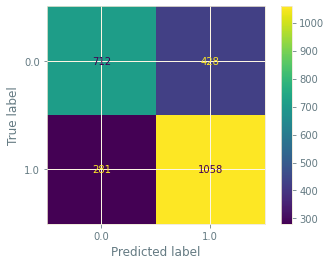

In [107]:
puntajes(X_test,X_train,y_test, y_test_pred, logreg)

In [108]:
accuracy_score(y_final, y_final_predict)

0.7814634146341464

### Naive Bayes

In [109]:
y_final_predict = gnb.predict(X_final)

accuracy_score(y_final, y_final_predict)

0.776219512195122

AC SCORE TRAIN: 0.6702973720608575
AC SCORE TEST: 0.6845502218636547
F1 SCORE:  0.6742790321525858


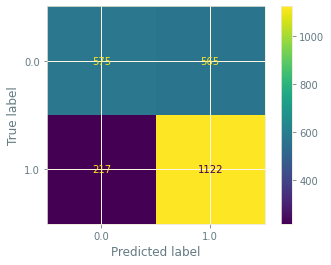

In [110]:
puntajes(X_test,X_train,y_test, y_test_pred, gnb)

La métrica accuracy indica que el modelo presenta buen desempeño, permitiendo evaluar si un pais aplicó cuarentena o no.

In [111]:
# Se crea una tabla de métricas obtenidas:
print('TABLA DE MÉTRICAS RESULTANTES')
t_scores= pd.DataFrame({'CANT PAÍSES TRAIN': [1,1,10,10,10,10],
                        'CANT PAÍSES TEST': [1,1,10,10,10,10],
                        'MODELO': ['BENCHMARK', 'Reg Logística', 'Reg Logística', 'Naives Bayes', 'Reg Logística','Naives Bayes'],
                        'SCORE': [0.89,0.89, 0.71, 0.67,0.67,0.67],
                        'COMENTARIOS': ['UAE','UAE','GRUPO A','GRUPO A','GRUPO B','GRUPO B']})
t_scores

TABLA DE MÉTRICAS RESULTANTES


,CANT PAÍSES TRAIN,CANT PAÍSES TEST,MODELO,SCORE,COMENTARIOS
0,1,1,BENCHMARK,0.89,UAE
1,1,1,Reg Logística,0.89,UAE
2,10,10,Reg Logística,0.71,GRUPO A
3,10,10,Naives Bayes,0.67,GRUPO A
4,10,10,Reg Logística,0.67,GRUPO B
5,10,10,Naives Bayes,0.67,GRUPO B


Al evaluar el modelo Regresión Logística con el grupo B de países, optimizado anteriormente con el grupo A, se aprecia una caída de F1 SCORE de 0.71 a 0.67.

# Investigación

¿Como funciona el modelo si lo probamos con todos los paises del dataset?

Dado el comportamiento del modelo optimizado anterior, reflejado por el score obtenido decreciente al predecir la cuarentena para distinto grupo de países, se procede ahora a realizar una nueva optimización de hiperparámetros.

**Preparación de data**

In [112]:
quarentine_all = data_cuarentena.copy()
quarentine_all.set_index("date", inplace=True)

In [113]:
all_df = data_original[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
all_df.date = pd.to_datetime(all_df.date)
all_df

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
0,Afghanistan,2020-02-24,NaN,NaN,8.33
1,Afghanistan,2020-02-25,NaN,NaN,8.33
2,Afghanistan,2020-02-26,NaN,NaN,8.33
3,Afghanistan,2020-02-27,NaN,NaN,8.33
4,Afghanistan,2020-02-28,NaN,NaN,8.33
...,...,...,...,...,...
192296,Zimbabwe,2022-06-03,12.088,NaN,NaN
192297,Zimbabwe,2022-06-04,12.088,NaN,NaN
192298,Zimbabwe,2022-06-05,11.794,NaN,NaN
192299,Zimbabwe,2022-06-06,13.403,NaN,NaN


In [114]:
list_all_countries = all_df.location.unique().tolist()
list_all_countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [115]:
list = []

for i in list_all_countries:

    dt = all_df[(all_df.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = quarentine_all[quarentine_all.location == i].stay_home_requirements
    list.append(dt)

dt_modelo_3 = pd.concat(list)

In [116]:
dt_modelo_3

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-02-24,0.000,0.0,8.33,0.0
2020-02-25,0.000,0.0,8.33,0.0
2020-02-26,0.000,0.0,8.33,0.0
2020-02-27,0.000,0.0,8.33,0.0
2020-02-28,0.000,0.0,8.33,0.0
...,...,...,...,...
2022-06-03,12.088,0.0,0.00,NaN
2022-06-04,12.088,0.0,0.00,NaN
2022-06-05,11.794,0.0,0.00,NaN


In [117]:
dt_modelo_3.dropna(inplace=True)

Separemos la data...

In [118]:
X = dt_modelo_3.drop(columns=["y_cuarentena"])
y = dt_modelo_3.y_cuarentena

## Regresion Logistica

Separemos train de test

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

Creamos el modelo

In [120]:
#Creamos el modelo
logreg = LogisticRegression()

#Grilla de hiperparámetros
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001,  0.01, 0.1,  1 , 10, 100 , 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

#Ajustamos modelo con hiperparámetros
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)
#Entrenamos
model.fit(X_train, y_train)

#Obtenemos mejores parámetros
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.7901941277443407


Se evalúa el modelo con los parámetros optimizados

In [121]:
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [122]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

AC SCORE TRAIN: 0.7900797925584144
AC SCORE TEST: 0.7891095936116734
F1 SCORE:  0.7871279572195067


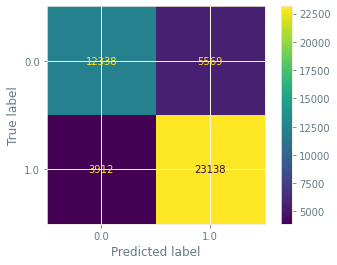

In [123]:
puntajes(X_test,X_train,y_test, y_test_pred, logreg)

In [124]:
logreg.score(X_test, y_test)

0.7891095936116734

In [125]:
# Se crea una tabla de métricas obtenidas:
print('TABLA DE MÉTRICAS RESULTANTES')
t_scores= pd.DataFrame({'CANT PAÍSES TRAIN': [1,1,10,10,10,10,171],
                        'CANT PAÍSES TEST': [1,1,10,10,10,10,73],
                        'MODELO': ['BENCHMARK', 'Reg Logística', 'Reg Logística', 'Naives Bayes', 'Reg Logística','Naives Bayes','Reg Logística'],
                        'SCORE': [0.89,0.89, 0.71, 0.67,0.67,0.67,0.787],
                        'COMENTARIOS': ['UAE','UAE','GRUPO A','GRUPO A','GRUPO B','GRUPO B','TODOS']})
t_scores

TABLA DE MÉTRICAS RESULTANTES


,CANT PAÍSES TRAIN,CANT PAÍSES TEST,MODELO,SCORE,COMENTARIOS
0,1,1,BENCHMARK,0.890,UAE
1,1,1,Reg Logística,0.890,UAE
2,10,10,Reg Logística,0.710,GRUPO A
3,10,10,Naives Bayes,0.670,GRUPO A
4,10,10,Reg Logística,0.670,GRUPO B
5,10,10,Naives Bayes,0.670,GRUPO B
6,171,73,Reg Logística,0.787,TODOS


Al observar la tabla anterior, que acumula los scores de los distintos modelos evaluados, se advierte una notable mejoría de desempeño del modelo Regresión Logística evaluado con gran cantidad de países (0.787), en contraste con las pruebas iniciales realizadas en las que se optimizaba dicho modelo con solo un grupo de 10 países (GRUPO A, 0.71).

## Conclusiones

En el presente proyecto se hicieron predicciones con modelos de machine learning, Regresión Logística y Naives Bayes, sobre la política de aplicación de cuarentena durante la pandemia COVID-19 para distintos grupos de países disponibles entre los datos asignados.

Se dispuso de dos datasets. Uno de ellos contuvo datos de contagios, vacunación, mortalidad, etc. para 244 países. El segundo dataset contenía datos sobre la aplicación de cuarentena por parte de los distintos países contenidos en el dataset anterior.

Luego de hacer un EDA, reconociendo las columnas sobre las que luego se realizó el estudio, se procedió a evaluar dos modelos:

1.   BENCHMARK tipo Regresión Logística
2.   Regresión Logística optimizado con GridSearchCV

Ambos modelos fueron evaluados con datos de solo un país (United Arab Emirates). 

El modelo 1 fue evaluado con sus hiperparámetros por defecto, arrojando un **F1 SCORE de 0.89**.

El modelo 2, en cambio, fue optimizado, arrojando un **F1 SCORE de 0.89**, al igual que el modelo 1.

Seguido de esto se procedió a seleccionar un grupo de 10 países (GRUPO A), para repetir el procedimiento de optimización y evaluación de modelo Regresión Logística y además Naives Bayes.

Estos arrojaron un **F1 SCORE de 0.89** y **0.898**, respectivamente.

Una vez obtenido el modelo ajustado con los países del GRUPO A, se tomó dicho modelo y se hicieron predicciones para el grupo de países B, arrojando los siguientes scores:

1.   Regresión Logística, **F1 SCORE de 0.71**
2.   Naives Bayes, **F1 SCORE de 0.67**

Se aprecia una caída en el valor F1 SCORE de 0.89 para GRUPO A a 0.787 para GRUPO B.

Al observar la variabilidad del score obtenido al optimizar y evaluar modelos con solo 10 países, se procedió a investigar el comportamiento de un modelo de Regresión Logística al ser entrenado con el 70% del dataset.

El F1 SCORE obtenido fue, 0.787, mostrando una mejoría considerable.

Se puede destacar que se hicieron evaluaciones y optimizaciones de distintos modelos tipo Regresión Logística y Naives Bayes para distintos casos. Finalmente se realiza la evaluación de un modelo Regresión Logística entrenado con el 70% del dataset, lo cual reflejó una buena predicción de la política de cuarentena adoptada en distinta medida por los distintos países.
